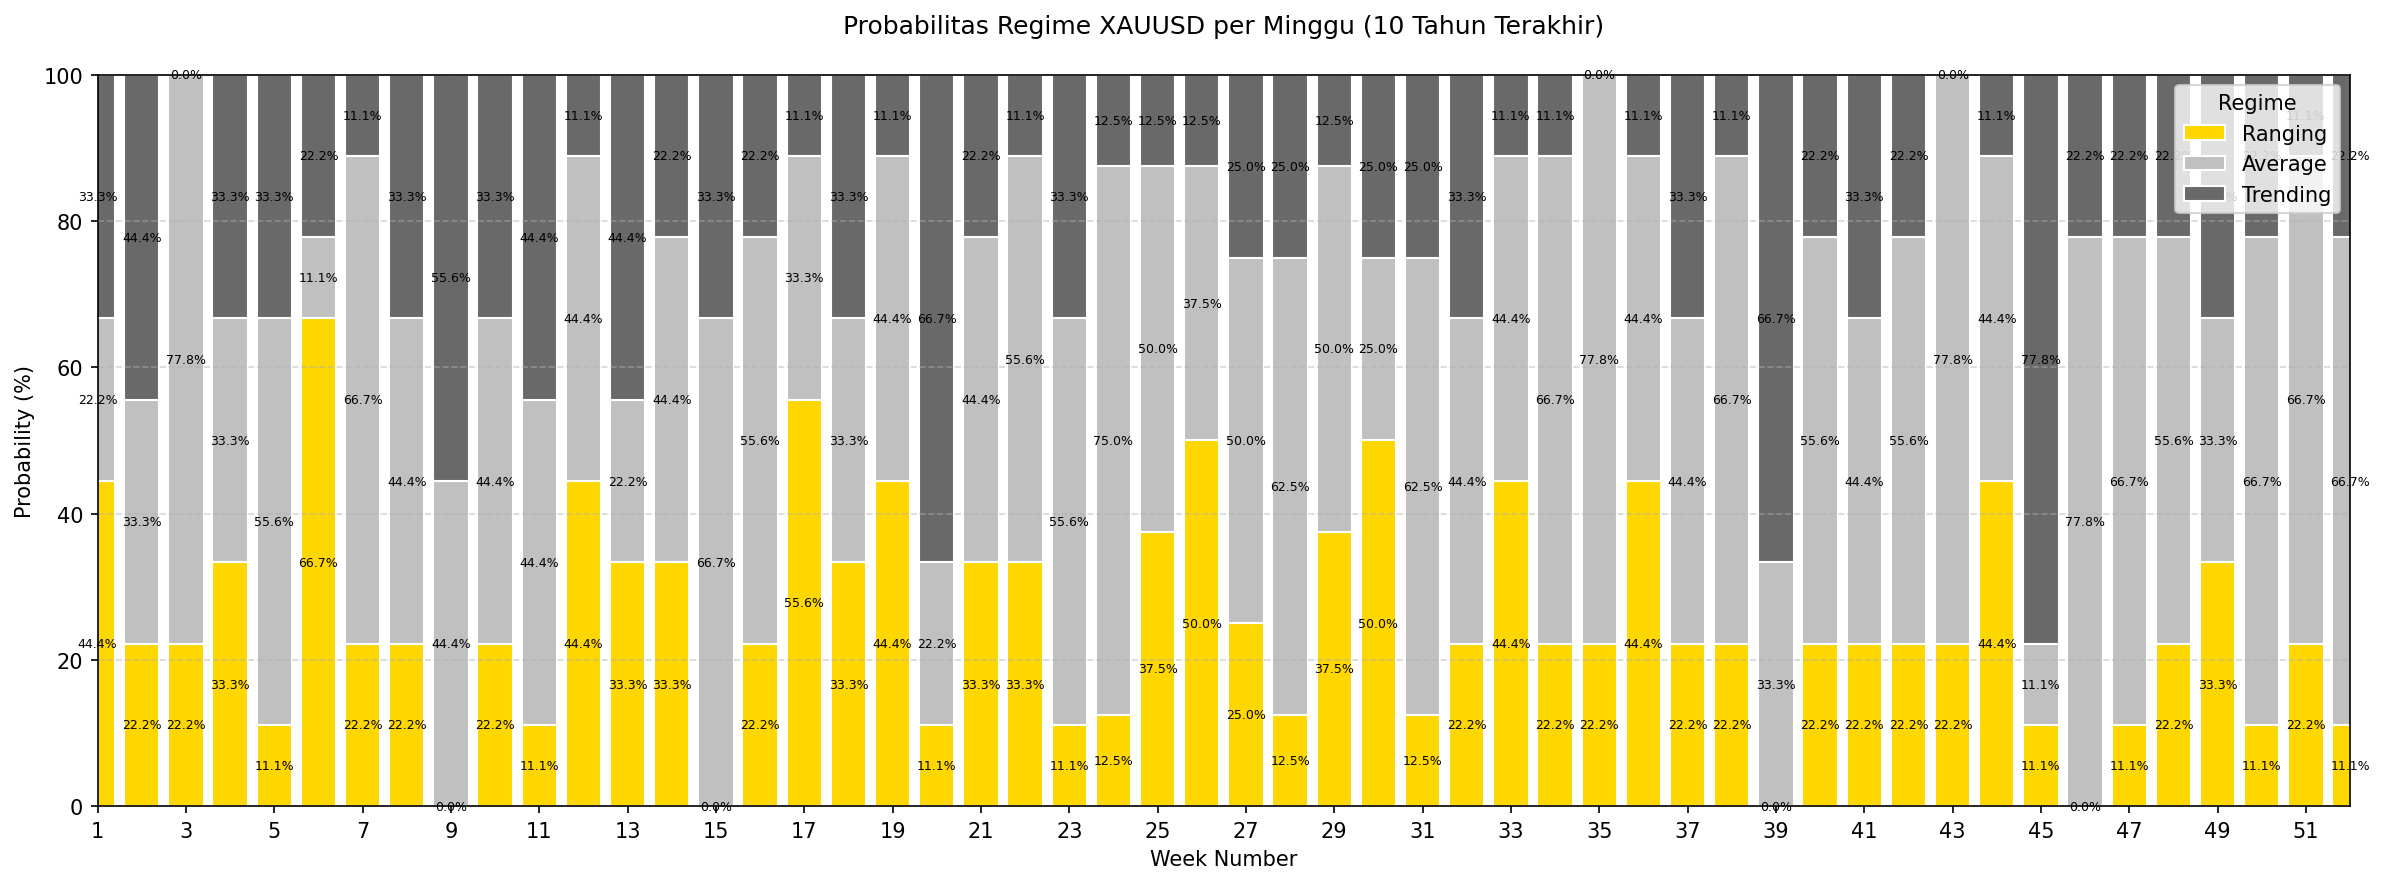

📅 Hari ini (2025-06-10) adalah minggu ke-24 di tahun 2025.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Load & prepare data
df = pd.read_csv("XAUUSD_Daily_201608090000_202506080000.csv", delim_whitespace=True)
df.columns = [c.strip('<>') for c in df.columns]
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y.%m.%d')
df.set_index('DATE', inplace=True)

# Weekly close-to-close range
weekly = df['CLOSE'].resample('W').agg(['first', 'last']).dropna()
weekly['range'] = (weekly['last'] - weekly['first']).abs()
weekly['year'] = weekly.index.isocalendar().year
weekly['week'] = weekly.index.isocalendar().week

# Filter last 10 years
latest_years = sorted(weekly['year'].unique())[-10:]
weekly = weekly[weekly['year'].isin(latest_years)]

# Quantile-based classification per year
def classify_by_quantile(group):
    q1 = group['range'].quantile(0.25)
    q3 = group['range'].quantile(0.75)
    return group['range'].apply(lambda x: 'Ranging' if x <= q1 
                                         else 'Trending' if x >= q3 
                                         else 'Average')

weekly['regime'] = weekly.groupby('year', group_keys=False).apply(classify_by_quantile)

# Compute probabilities per week
prob = weekly.groupby(['week', 'regime']).size().unstack(fill_value=0)
prob = prob.div(prob.sum(axis=1), axis=0) * 100

# Plot stacked bar chart with annotations
colors = {'Ranging': 'gold', 'Average': 'silver', 'Trending': 'dimgray'}
fig, ax = plt.subplots(figsize=(16, 6), dpi=150)

bottom = np.zeros(len(prob))
containers = []
for regime in ['Ranging', 'Average', 'Trending']:
    vals = prob.get(regime, pd.Series(0, index=prob.index))
    bars = ax.bar(prob.index, vals, bottom=bottom, color=colors[regime], 
                  label=regime, edgecolor='white')
    containers.append(bars)
    bottom += vals

# Annotate each bar segment with its percentage
for container in containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=6, color='black')

ax.set_xlabel('Week Number')
ax.set_ylabel('Probability (%)')
ax.set_title('Probabilitas Regime XAUUSD per Minggu (10 Tahun Terakhir)', pad=20)
ax.set_xlim(1, 52)
ax.set_xticks(np.arange(1, 53, 2))
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.legend(loc='upper right', title='Regime')

plt.tight_layout()
plt.savefig("XAUUSD_weekly_regime_prob.png", dpi=300)
plt.show()

# --- Info: Hari ini minggu ke berapa ---
today = pd.Timestamp.today()
week_num = today.isocalendar().week
year_num = today.year

print(f"📅 Hari ini ({today.date()}) adalah minggu ke-{week_num} di tahun {year_num}.")


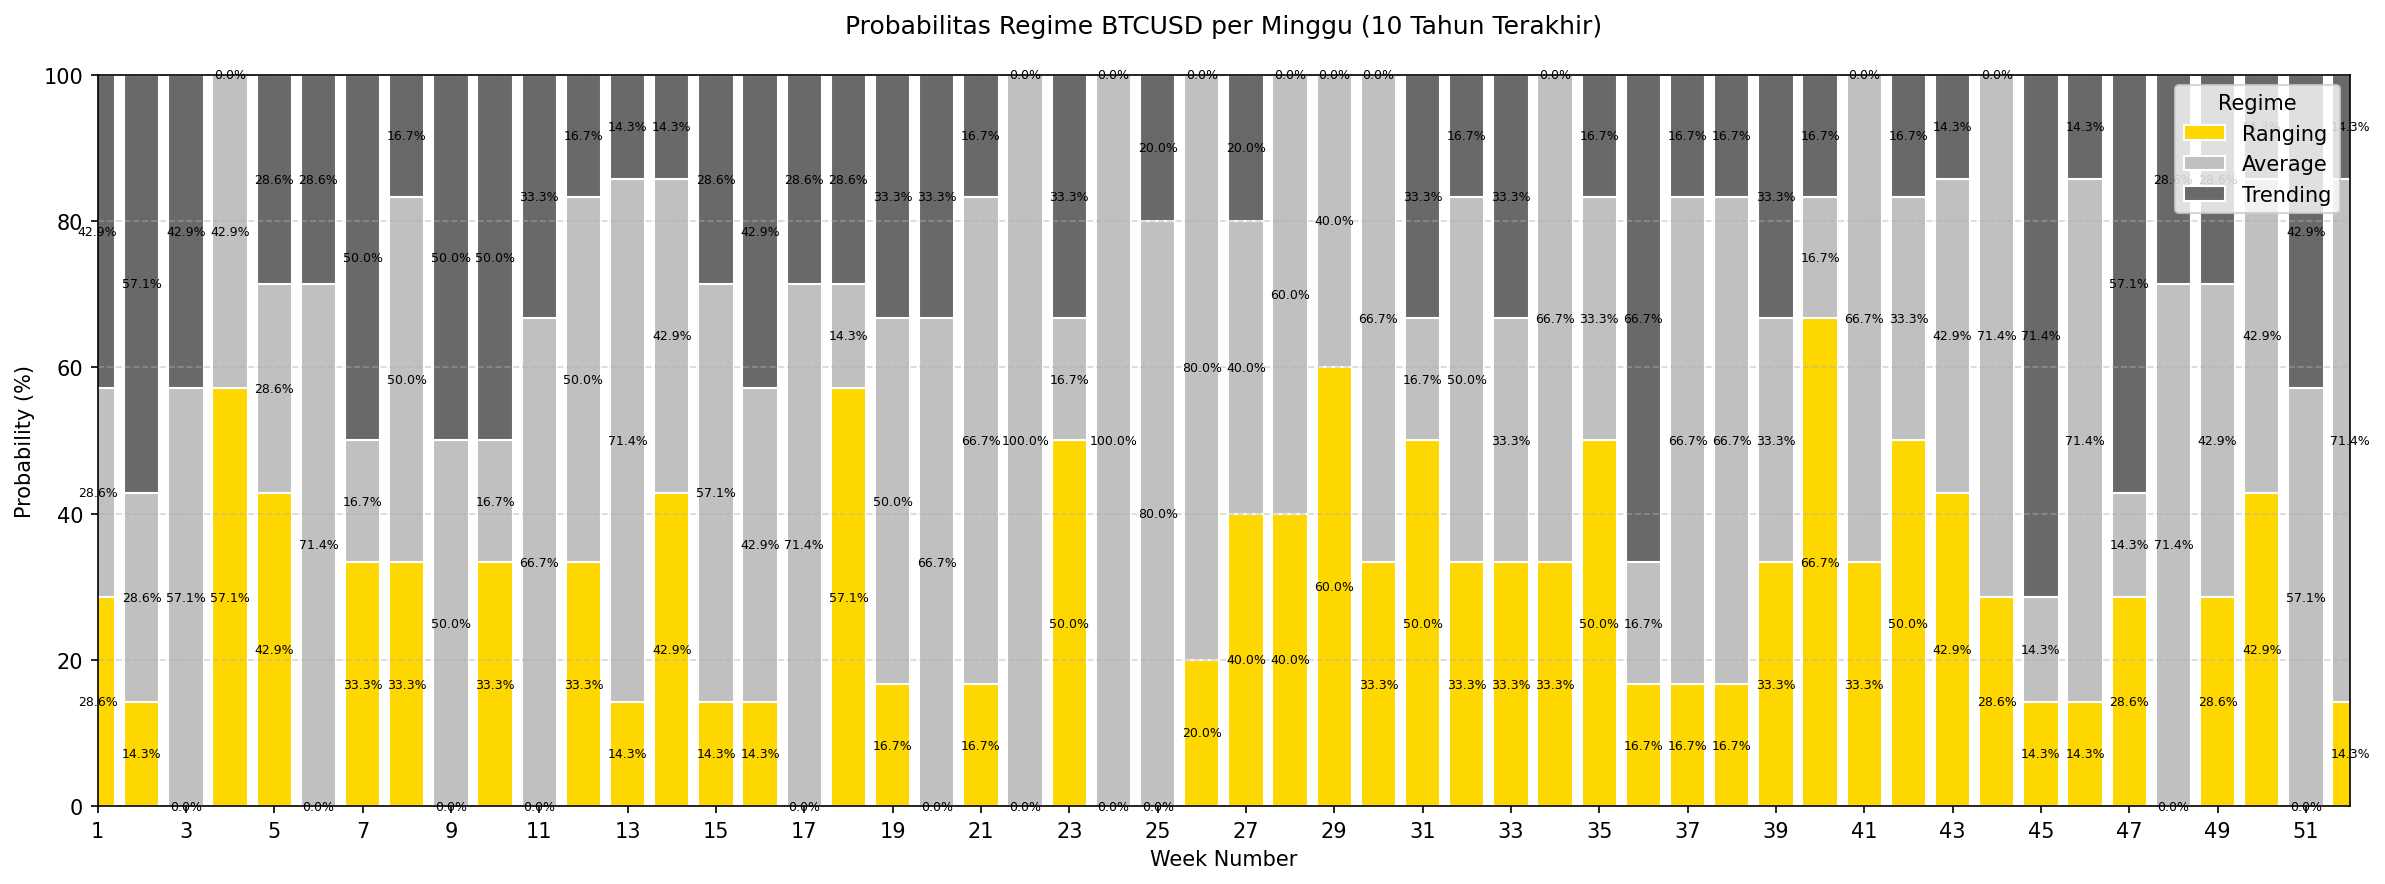

📅 Hari ini (2025-06-10) adalah minggu ke-24 di tahun 2025.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Load & prepare data
df = pd.read_csv("BTCUSD_Daily_201803270000_202506080000.csv", delim_whitespace=True)
df.columns = [c.strip('<>') for c in df.columns]
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y.%m.%d')
df.set_index('DATE', inplace=True)

# Weekly close-to-close range
weekly = df['CLOSE'].resample('W').agg(['first', 'last']).dropna()
weekly['range'] = (weekly['last'] - weekly['first']).abs()
weekly['year'] = weekly.index.isocalendar().year
weekly['week'] = weekly.index.isocalendar().week

# Filter last 10 years
latest_years = sorted(weekly['year'].unique())[-10:]
weekly = weekly[weekly['year'].isin(latest_years)]

# Quantile-based classification per year
def classify_by_quantile(group):
    q1 = group['range'].quantile(0.25)
    q3 = group['range'].quantile(0.75)
    return group['range'].apply(lambda x: 'Ranging' if x <= q1 
                                         else 'Trending' if x >= q3 
                                         else 'Average')

weekly['regime'] = weekly.groupby('year', group_keys=False).apply(classify_by_quantile)

# Compute probabilities per week
prob = weekly.groupby(['week', 'regime']).size().unstack(fill_value=0)
prob = prob.div(prob.sum(axis=1), axis=0) * 100

# Plot stacked bar chart with annotations
colors = {'Ranging': 'gold', 'Average': 'silver', 'Trending': 'dimgray'}
fig, ax = plt.subplots(figsize=(16, 6), dpi=150)

bottom = np.zeros(len(prob))
containers = []
for regime in ['Ranging', 'Average', 'Trending']:
    vals = prob.get(regime, pd.Series(0, index=prob.index))
    bars = ax.bar(prob.index, vals, bottom=bottom, color=colors[regime], 
                  label=regime, edgecolor='white')
    containers.append(bars)
    bottom += vals

# Annotate each bar segment with its percentage
for container in containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=6, color='black')

ax.set_xlabel('Week Number')
ax.set_ylabel('Probability (%)')
ax.set_title('Probabilitas Regime BTCUSD per Minggu (10 Tahun Terakhir)', pad=20)
ax.set_xlim(1, 52)
ax.set_xticks(np.arange(1, 53, 2))
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.legend(loc='upper right', title='Regime')

plt.tight_layout()
plt.savefig("BTCUSD_weekly_regime_prob.png", dpi=300)
plt.show()

# --- Info: Hari ini minggu ke berapa ---
today = pd.Timestamp.today()
week_num = today.isocalendar().week
year_num = today.year

print(f"📅 Hari ini ({today.date()}) adalah minggu ke-{week_num} di tahun {year_num}.")

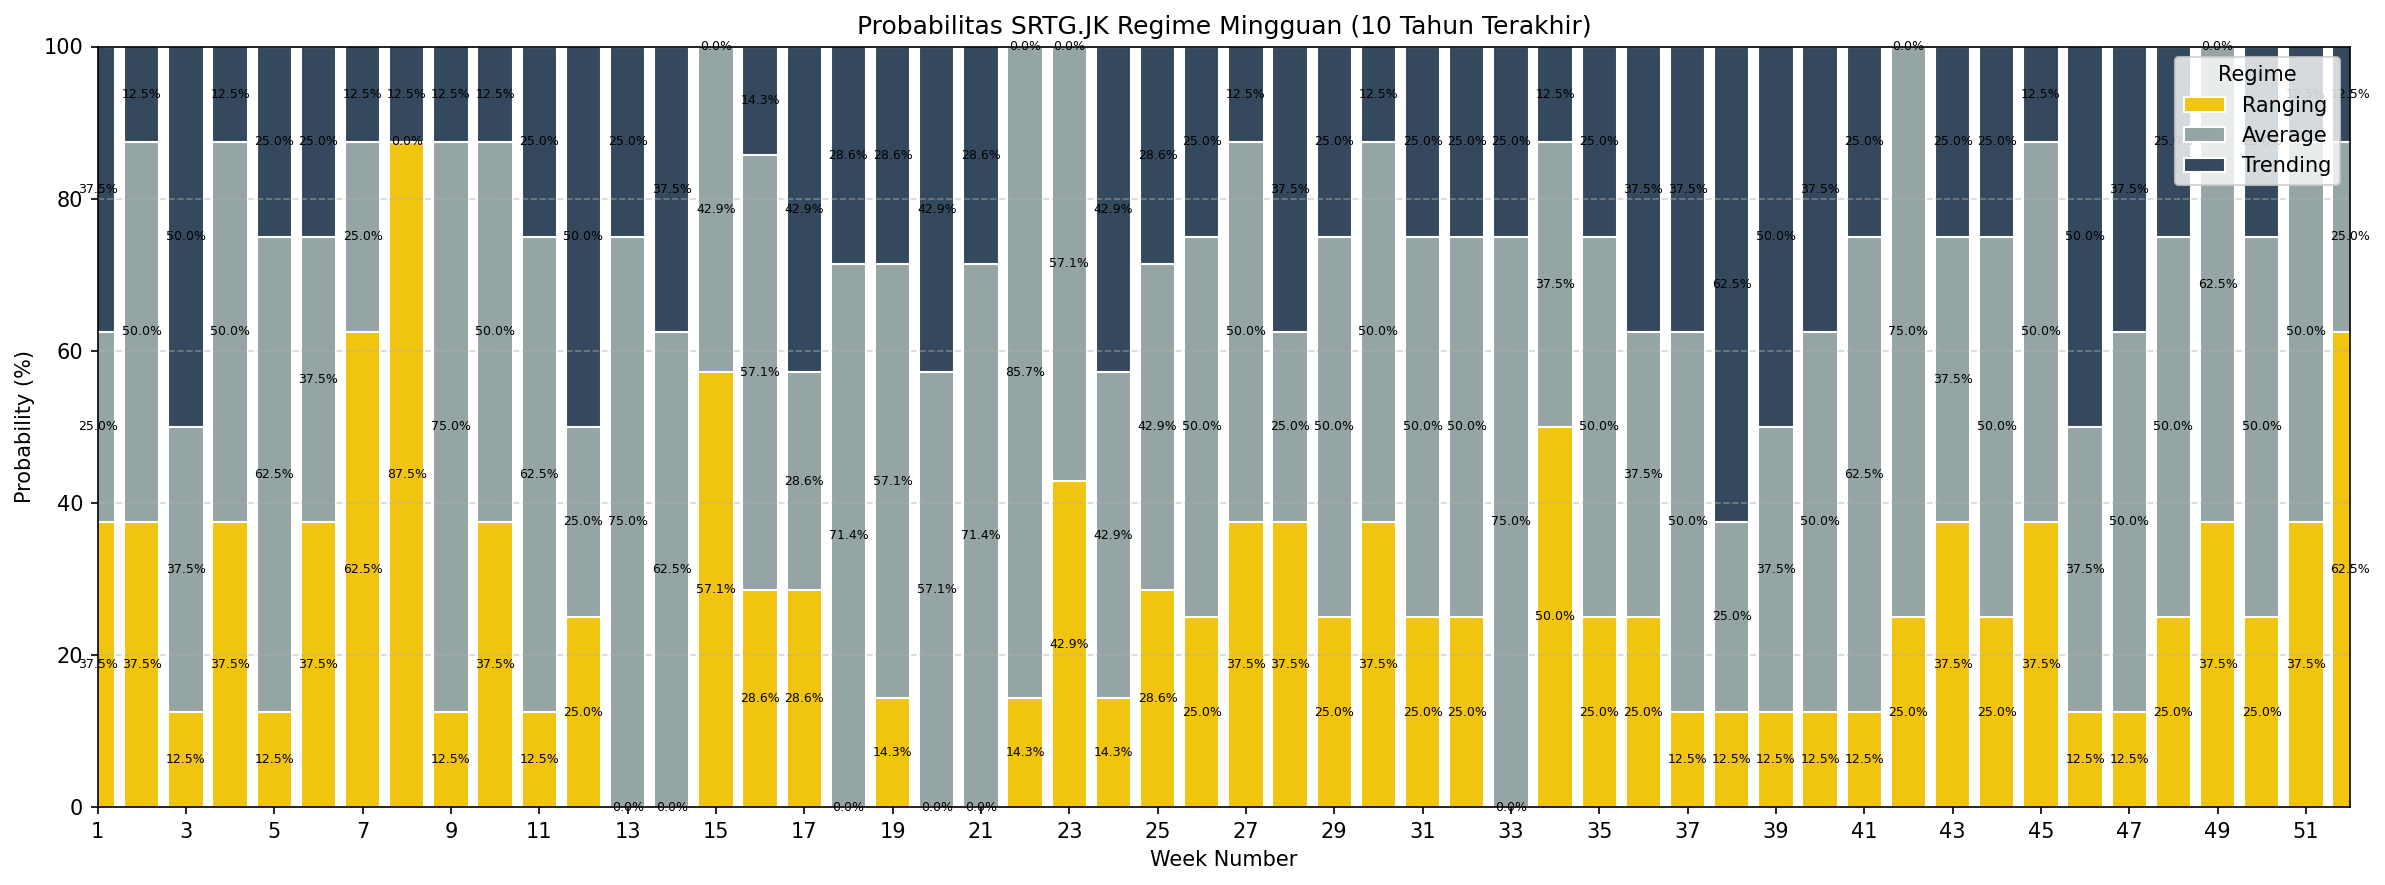

📅 Hari ini (2025-06-10) adalah minggu ke-24 di tahun 2025.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_and_prepare_adaptively(filepath):
    df = pd.read_csv(filepath)

    # Normalisasi nama kolom
    df.columns = [c.strip().lower() for c in df.columns]

    # Cari kolom tanggal
    date_col = next((col for col in df.columns if 'date' in col), None)
    if not date_col:
        raise ValueError("Tidak menemukan kolom tanggal.")
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df = df.dropna(subset=[date_col])
    df.set_index(date_col, inplace=True)

    # Cari kolom harga (close, price, adj close)
    price_keywords = ['adj close', 'close', 'price']
    price_col = next((col for keyword in price_keywords for col in df.columns if keyword in col), None)
    if not price_col:
        raise ValueError("Tidak menemukan kolom harga.")
    df[price_col] = pd.to_numeric(df[price_col], errors='coerce')

    # Hitung perubahan absolut harian
    df['abs_diff'] = df[price_col].diff().abs()
    df.dropna(subset=['abs_diff'], inplace=True)

    return df

# ============== LOAD & PROCESS ==============

# Ganti dengan path CSV kamu
filepath = "https_3A_2F_2Ffinance.yahoo.com_2Fquote_2FSRTG.JK_2Fhistory_2F_3Fperiod1_3D1372212000_26period2_3D1749473152.csv"
df = load_and_prepare_adaptively(filepath)

# Resample mingguan dan hitung range mingguan
weekly = df['abs_diff'].resample('W').sum().to_frame(name='range')
weekly['year'] = weekly.index.isocalendar().year
weekly['week'] = weekly.index.isocalendar().week

# Ambil hanya 10 tahun terakhir
latest_years = weekly['year'].sort_values().unique()[-10:]
weekly = weekly[weekly['year'].isin(latest_years)]

# Klasifikasi regime per tahun
def classify(group):
    q1 = group['range'].quantile(0.25)
    q3 = group['range'].quantile(0.75)
    return group['range'].apply(lambda x: 'Ranging' if x <= q1 else 'Trending' if x >= q3 else 'Average')

weekly['regime'] = weekly.groupby('year', group_keys=False).apply(classify)

# Hitung probabilitas per minggu
prob = weekly.groupby(['week', 'regime']).size().unstack(fill_value=0)
prob = prob.div(prob.sum(axis=1), axis=0) * 100

# ============== PLOT CHART ==============

fig, ax = plt.subplots(figsize=(16, 6), dpi=150)

colors = {'Ranging': '#f1c40f', 'Average': '#95a5a6', 'Trending': '#34495e'}
bottom = np.zeros(len(prob))
bars = {}

for regime in ['Ranging', 'Average', 'Trending']:
    vals = prob.get(regime, pd.Series(0, index=prob.index))
    bars[regime] = ax.bar(prob.index, vals, bottom=bottom,
                          color=colors[regime], label=regime, edgecolor='white')
    bottom += vals

# Tambahkan label persentase
for regime, bc in bars.items():
    ax.bar_label(bc, fmt='%.1f%%', label_type='center', fontsize=6, color='black')


# Finalisasi chart
ax.set_title("Probabilitas SRTG.JK Regime Mingguan (10 Tahun Terakhir)")
ax.set_xlabel("Week Number")
ax.set_ylabel("Probability (%)")
ax.set_xlim(1, 52)
ax.set_xticks(np.arange(1, 53, 2))
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.legend(title='Regime', loc='upper right')
plt.tight_layout()

# Simpan ke PNG
plt.savefig("SRTGJK_weekly_regime_with_table.png", bbox_inches='tight')
plt.show()

# --- Info: Hari ini minggu ke berapa ---
today = pd.Timestamp.today()
week_num = today.isocalendar().week
year_num = today.year

print(f"📅 Hari ini ({today.date()}) adalah minggu ke-{week_num} di tahun {year_num}.")


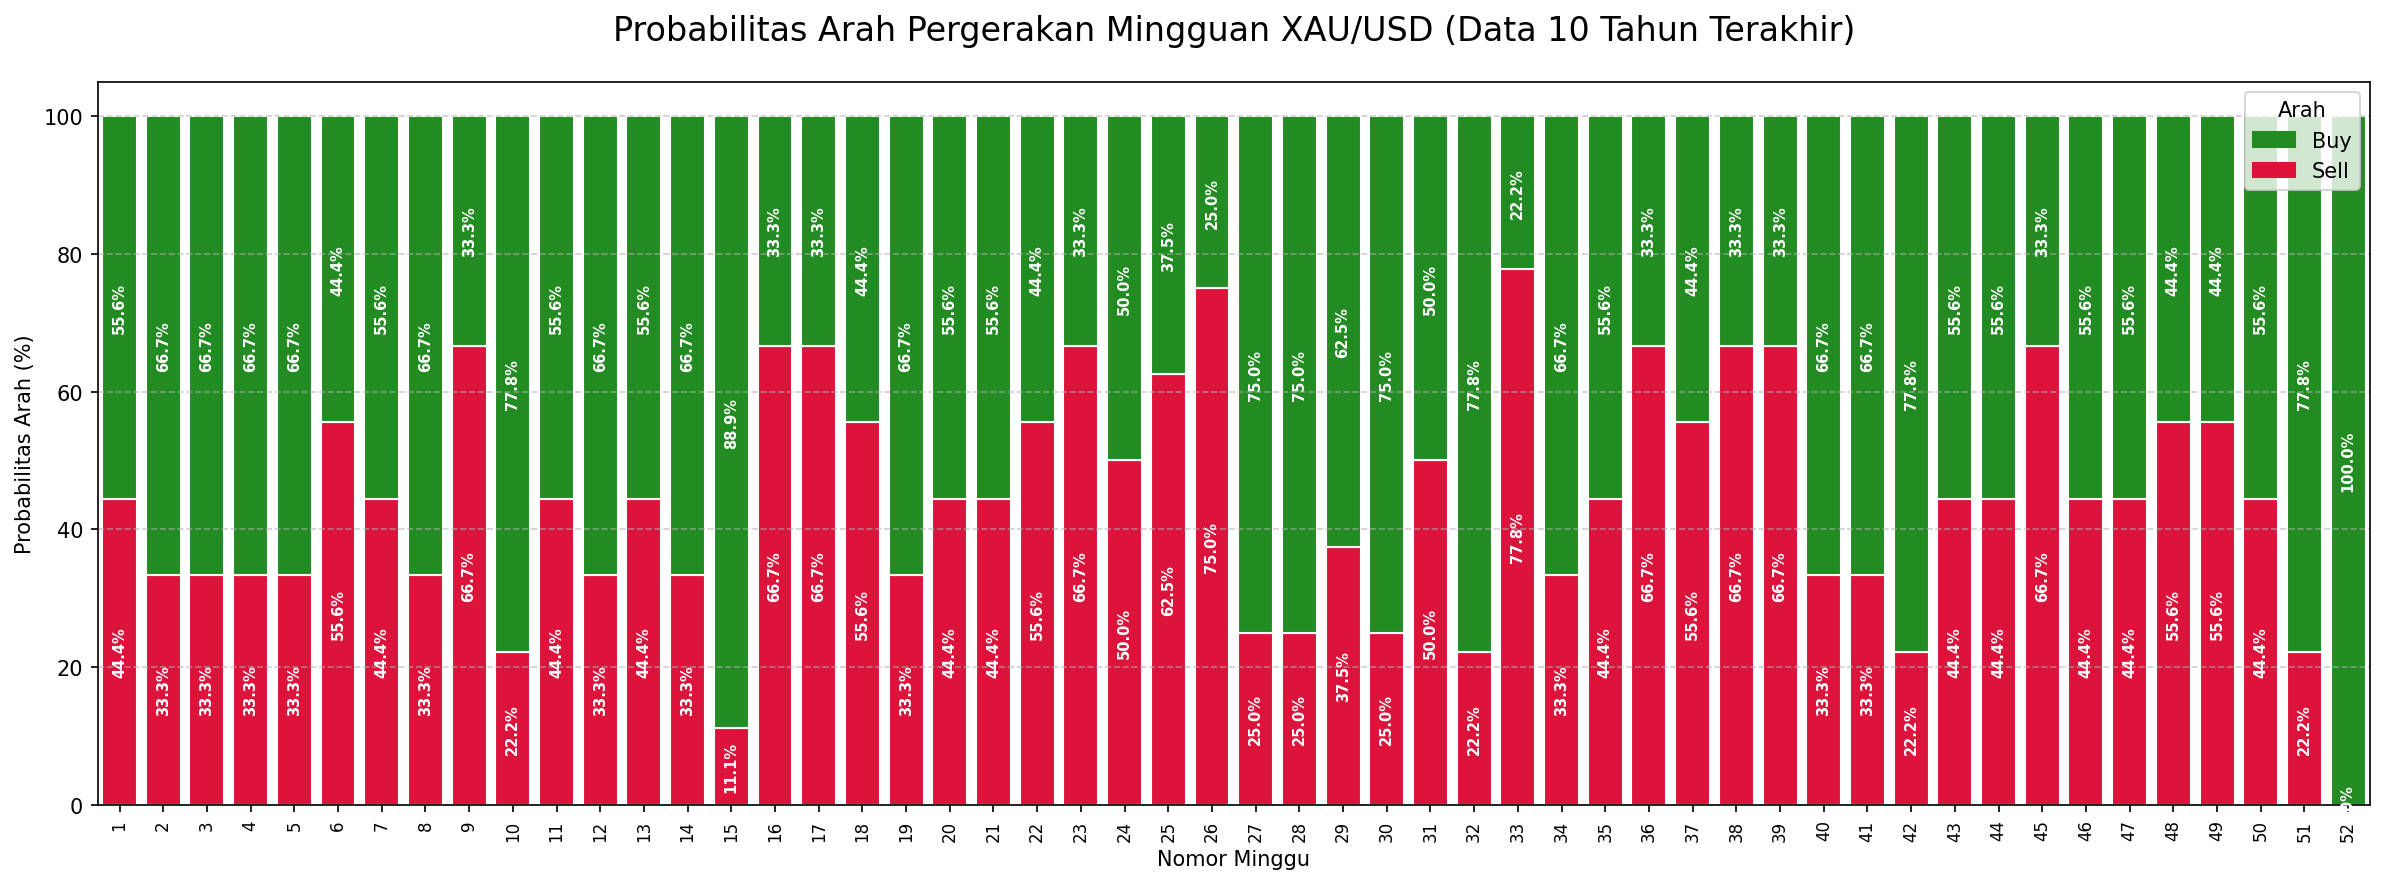

📊 Analisis Probabilitas Arah Mingguan XAU/USD
📅 Hari ini (11 June 2025) adalah bagian dari minggu ke-24 tahun 2025.

Probabilitas untuk Minggu ke-24 (berdasarkan data 10 tahun):
  🟢 Buy:  50.00%
  🔴 Sell: 50.00%


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# 1. Muat & siapkan data
# Pastikan file CSV "XAUUSD_Daily_201608090000_202506080000.csv" ada di direktori yang sama
try:
    df = pd.read_csv("XAUUSD_Daily_201608090000_202506080000.csv", delim_whitespace=True)
except FileNotFoundError:
    print("Error: Pastikan file 'XAUUSD_Daily_201608090000_202506080000.csv' berada di direktori yang sama.")
    exit()

df.columns = [c.strip('<>') for c in df.columns]
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y.%m.%d')
df.set_index('DATE', inplace=True)

# 2. Tentukan arah pergerakan mingguan (close-to-close)
weekly = df['CLOSE'].resample('W').agg(['first', 'last']).dropna()

# Tentukan arah: 'Buy' jika harga penutupan > pembukaan, 'Sell' jika sebaliknya
weekly['direction'] = np.where(weekly['last'] > weekly['first'], 'Buy', 'Sell')

# Mengabaikan minggu di mana harga tidak berubah (sangat jarang terjadi)
weekly = weekly[weekly['last'] != weekly['first']]

weekly['year'] = weekly.index.isocalendar().year
weekly['week'] = weekly.index.isocalendar().week

# 3. Filter data untuk 10 tahun terakhir
latest_years = sorted(weekly['year'].unique())[-10:]
weekly = weekly[weekly['year'].isin(latest_years)]

# 4. Hitung probabilitas arah pergerakan untuk setiap minggu
# Kelompokkan berdasarkan minggu dan arah, hitung jumlahnya, lalu ubah menjadi persentase
prob = weekly.groupby(['week', 'direction']).size().unstack(fill_value=0)
prob = prob.div(prob.sum(axis=1), axis=0) * 100

# Pastikan kolom 'Buy' dan 'Sell' ada untuk konsistensi
if 'Buy' not in prob.columns:
    prob['Buy'] = 0
if 'Sell' not in prob.columns:
    prob['Sell'] = 0

# 5. Buat plot grafik batang bertumpuk dengan anotasi
colors = {'Buy': 'forestgreen', 'Sell': 'crimson'}
fig, ax = plt.subplots(figsize=(16, 6), dpi=150)

# Plot 'Sell' terlebih dahulu agar 'Buy' berada di atas
bottom = np.zeros(len(prob))
containers = {}
for direction in ['Sell', 'Buy']:
    vals = prob.get(direction, pd.Series(0, index=prob.index))
    bars = ax.bar(prob.index, vals, bottom=bottom, color=colors[direction],
                  label=direction, edgecolor='white', width=0.8)
    containers[direction] = bars
    bottom += vals

# Tambahkan anotasi persentase di dalam setiap batang
for direction, container in containers.items():
    # >>> PERUBAHAN DI SINI: Menambahkan rotasi 90 derajat pada label
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=7, color='white', weight='bold', rotation=90)

# 6. Pengaturan detail grafik
ax.set_xlabel('Nomor Minggu')
ax.set_ylabel('Probabilitas Arah (%)')
ax.set_title('Probabilitas Arah Pergerakan Mingguan XAU/USD (Data 10 Tahun Terakhir)', pad=20, fontsize=16)
ax.set_xlim(0.5, 52.5)
ax.set_xticks(np.arange(1, 53, 1))
ax.tick_params(axis='x', labelsize=8, rotation=90)
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Membuat legenda
patches = [mpatches.Patch(color=color, label=label) for label, color in colors.items()]
ax.legend(handles=patches, loc='upper right', title='Arah')

plt.tight_layout()
plt.savefig("XAUUSD_weekly_direction_prob_vertical_annotation.png", dpi=300)
plt.show()

# --- Informasi Output ---
today = pd.Timestamp.today()
week_num = today.isocalendar().week
year_num = today.year

print(f"📊 Analisis Probabilitas Arah Mingguan XAU/USD")
print(f"📅 Hari ini ({today.strftime('%d %B %Y')}) adalah bagian dari minggu ke-{week_num} tahun {year_num}.")

# Tampilkan probabilitas untuk minggu ini
if week_num in prob.index:
    current_week_prob = prob.loc[week_num]
    buy_prob = current_week_prob.get('Buy', 0)
    sell_prob = current_week_prob.get('Sell', 0)
    print("\n" + "="*40)
    print(f"Probabilitas untuk Minggu ke-{week_num} (berdasarkan data 10 tahun):")
    print(f"  🟢 Buy:  {buy_prob:.2f}%")
    print(f"  🔴 Sell: {sell_prob:.2f}%")
    print("="*40)
else:
    print(f"\nTidak ada data historis yang cukup untuk minggu ke-{week_num}.")

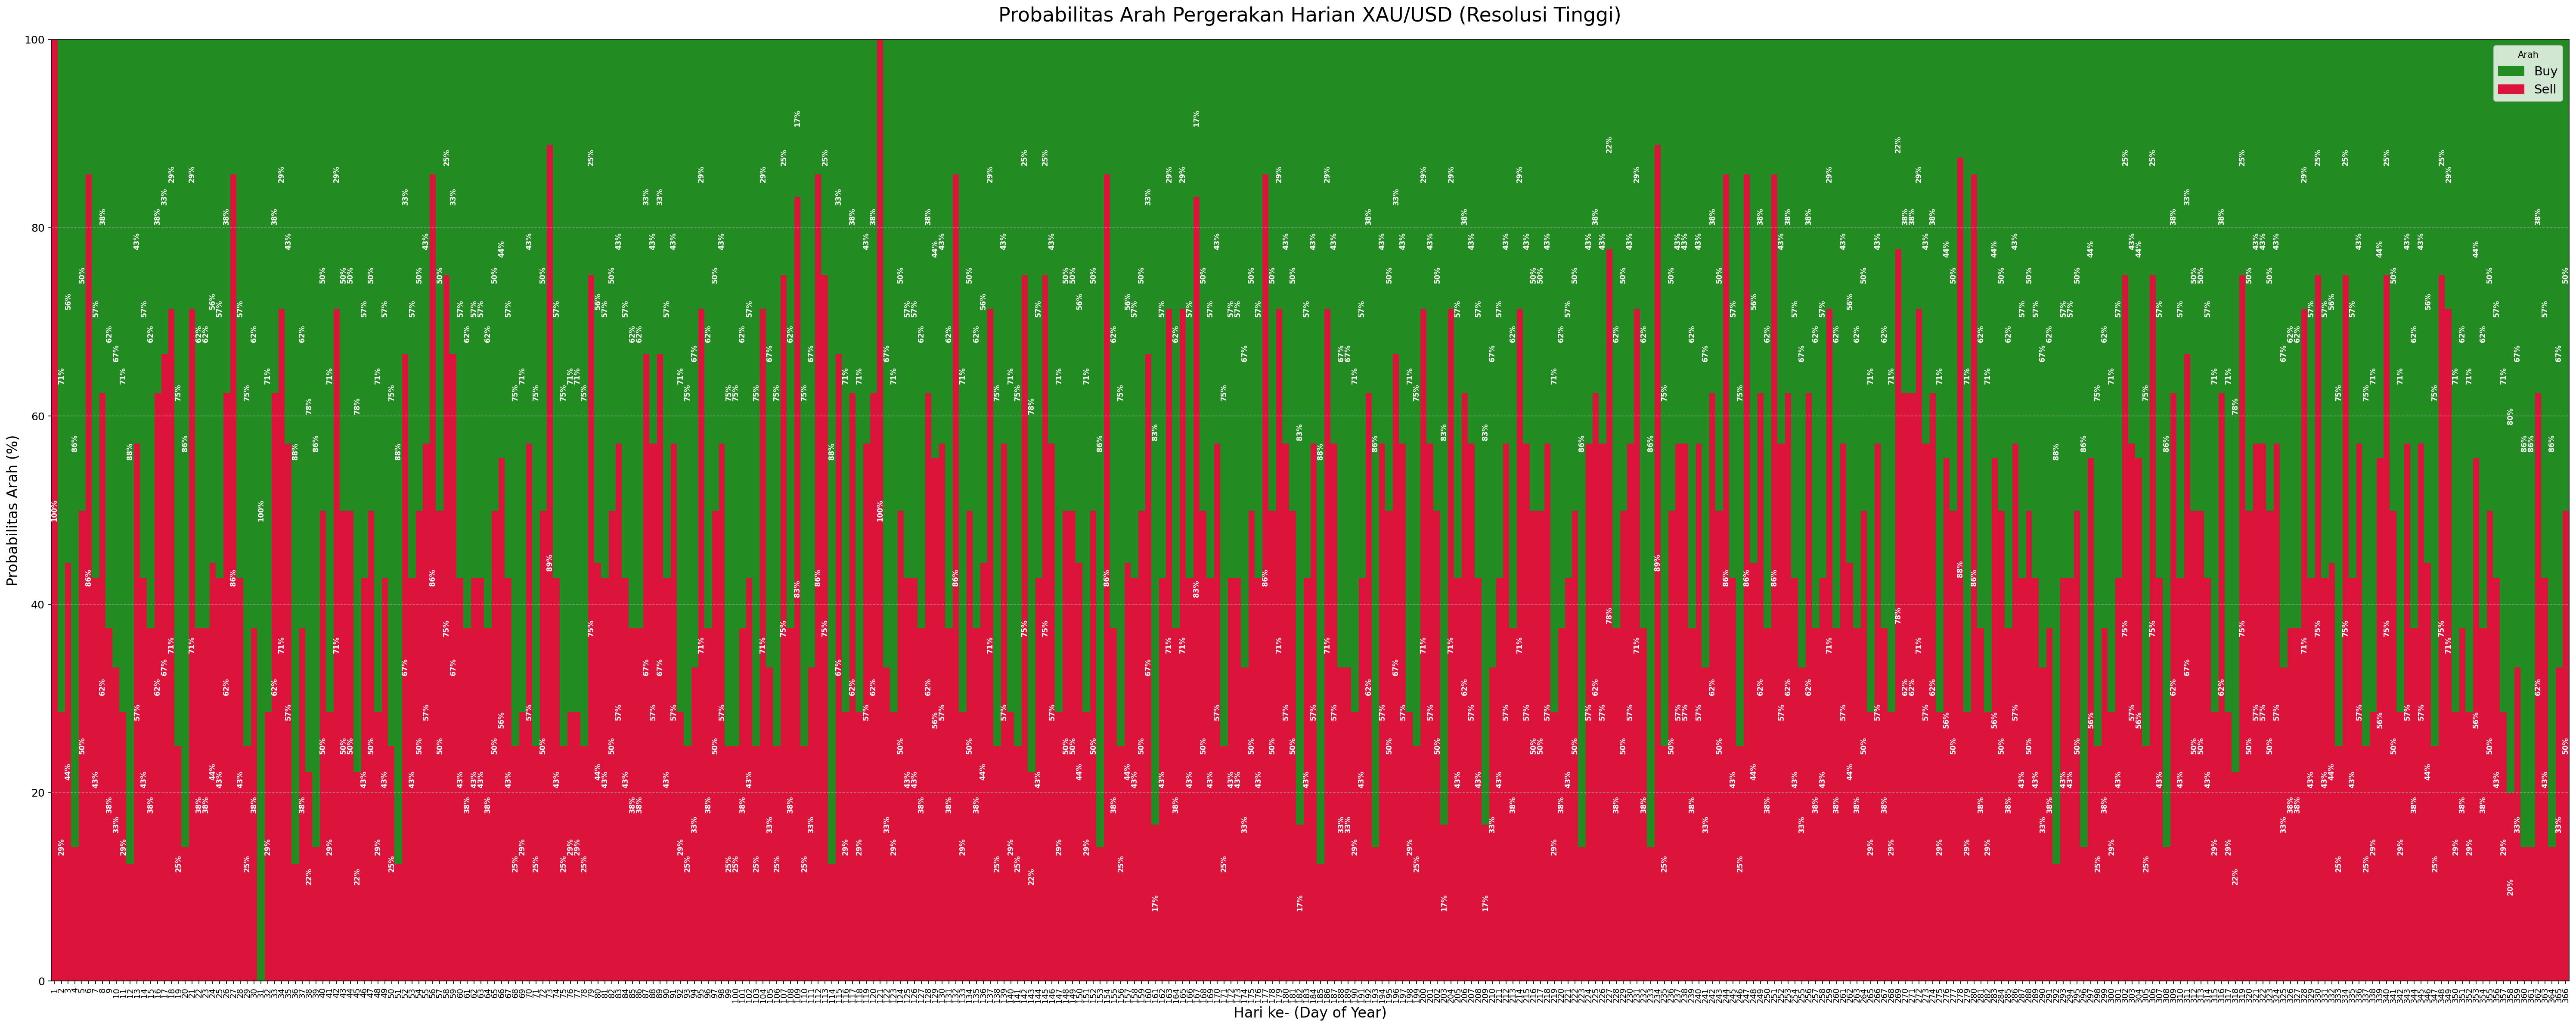

📊 Analisis Probabilitas Arah Harian XAU/USD
📅 Hari ini (11 June 2025) adalah hari ke-162 tahun 2025.

Probabilitas untuk Hari ke-162 (berdasarkan data 10 tahun):
  🟢 Buy:  57.14%
  🔴 Sell: 42.86%


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# 1. Muat & siapkan data
try:
    df = pd.read_csv("XAUUSD_Daily_201608090000_202506080000.csv", delim_whitespace=True)
except FileNotFoundError:
    print("Error: Pastikan file 'XAUUSD_Daily_201608090000_202506080000.csv' berada di direktori yang sama.")
    exit()

df.columns = [c.strip('<>') for c in df.columns]
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y.%m.%d')
df.set_index('DATE', inplace=True)

# 2. Tentukan arah pergerakan harian
df['direction'] = np.where(df['CLOSE'] > df['OPEN'], 'Buy', 'Sell')
df = df[df['CLOSE'] != df['OPEN']]
df['year'] = df.index.year
df['day_of_year'] = df.index.dayofyear

# 3. Filter data untuk 10 tahun terakhir
latest_years = sorted(df['year'].unique())[-10:]
daily_df = df[df['year'].isin(latest_years)].copy()

# 4. Hitung probabilitas arah pergerakan
prob = daily_df.groupby(['day_of_year', 'direction']).size().unstack(fill_value=0)
prob = prob.div(prob.sum(axis=1), axis=0) * 100
if 'Buy' not in prob.columns: prob['Buy'] = 0
if 'Sell' not in prob.columns: prob['Sell'] = 0
prob_reindexed = prob.reindex(np.arange(1, 367)).fillna(0)

# 5. Buat plot grafik batang dengan resolusi tinggi
colors = {'Buy': 'forestgreen', 'Sell': 'crimson'}
fig, ax = plt.subplots(figsize=(40, 16), dpi=150)

bottom = np.zeros(len(prob_reindexed))
containers = {}
for direction in ['Sell', 'Buy']:
    vals = prob_reindexed.get(direction, pd.Series(0, index=prob_reindexed.index))
    bars = ax.bar(prob_reindexed.index, vals, bottom=bottom, color=colors[direction],
                  label=direction, width=1.0, edgecolor=colors[direction])
    containers[direction] = bars
    bottom += vals

for direction, container in containers.items():
    labels = [f"{v:.0f}%" if v > 15 else "" for v in container.datavalues]
    ax.bar_label(
        container,
        labels=labels,
        label_type='center',
        fontsize=8,
        color='white',
        weight='bold',
        rotation=90
    )

# 6. Pengaturan detail grafik
ax.set_xlabel('Hari ke- (Day of Year)', fontsize=16)
ax.set_ylabel('Probabilitas Arah (%)', fontsize=16)
ax.set_title('Probabilitas Arah Pergerakan Harian XAU/USD (Resolusi Tinggi)', pad=20, fontsize=22)
ax.set_xlim(0.5, 366.5)

# >>> PERUBAHAN DI SINI: Label sumbu-X diatur untuk tampil setiap 5 hari
ax.set_xticks(np.arange(1, 367, 1)) 
# Ukuran font label disesuaikan
ax.tick_params(axis='x', labelsize=9, rotation=90) 
ax.tick_params(axis='y', labelsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)

patches = [mpatches.Patch(color=color, label=label) for label, color in colors.items()]
ax.legend(handles=patches, loc='upper right', title='Arah', fontsize=14)

plt.tight_layout()
plt.savefig("XAUUSD_daily_direction_prob_high_res_denser_axis.png", dpi=300)
plt.show()

# --- Informasi Output ---
today = pd.Timestamp.today()
day_of_year_num = today.dayofyear
year_num = today.year

print(f"📊 Analisis Probabilitas Arah Harian XAU/USD")
print(f"📅 Hari ini ({today.strftime('%d %B %Y')}) adalah hari ke-{day_of_year_num} tahun {year_num}.")

if day_of_year_num in prob.index:
    current_day_prob = prob.loc[day_of_year_num]
    buy_prob = current_day_prob.get('Buy', 0)
    sell_prob = current_day_prob.get('Sell', 0)
    print("\n" + "="*45)
    print(f"Probabilitas untuk Hari ke-{day_of_year_num} (berdasarkan data 10 tahun):")
    print(f"  🟢 Buy:  {buy_prob:.2f}%")
    print(f"  🔴 Sell: {sell_prob:.2f}%")
    print("="*45)
else:
    print(f"\nTidak ada data historis yang cukup untuk hari ke-{day_of_year_num}.")

🔄 Memulai proses analisis, mohon tunggu...
✅ Proses kalkulasi data selesai.

📊 Ringkasan Analisis Data Historis XAU/USD
📅 Hari ini: Wednesday, 11 June 2025 (Hari ke-162)
------------------------------------------------------------
  Probabilitas Arah:
    🟢 Probabilitas BUY: 57.14%
    🔴 Probabilitas SELL: 42.86%

  Karakteristik Historis Rata-rata untuk Hari Ini:
    📈 Rata-rata Gain (O-C) : 0.08%
    ↕️ Volatilitas Intraday (H-L) : $15.47
    ↔️ Volatilitas Interday (C-C): $8.5
    📋 Rezim Dominan          : Average
------------------------------------------------------------
📂 Semua output detail akan disimpan di folder:
   'Seasonal Data/2025-06-11 - XAUUSD_Daily_201608090000_202506080000'

📄 Menampilkan dan menyimpan tabel hasil analisis lengkap...

              Tabel Analisis Harian Lengkap XAU/USD (Range dalam Dolar, Data 10 Tahun Terakhir)
          Buy_%  Sell_%  Avg_Gain_%  Avg_Range_HL_$  Avg_Abs_Range_CC_$ Dominant_Regime
Hari_ke                                            

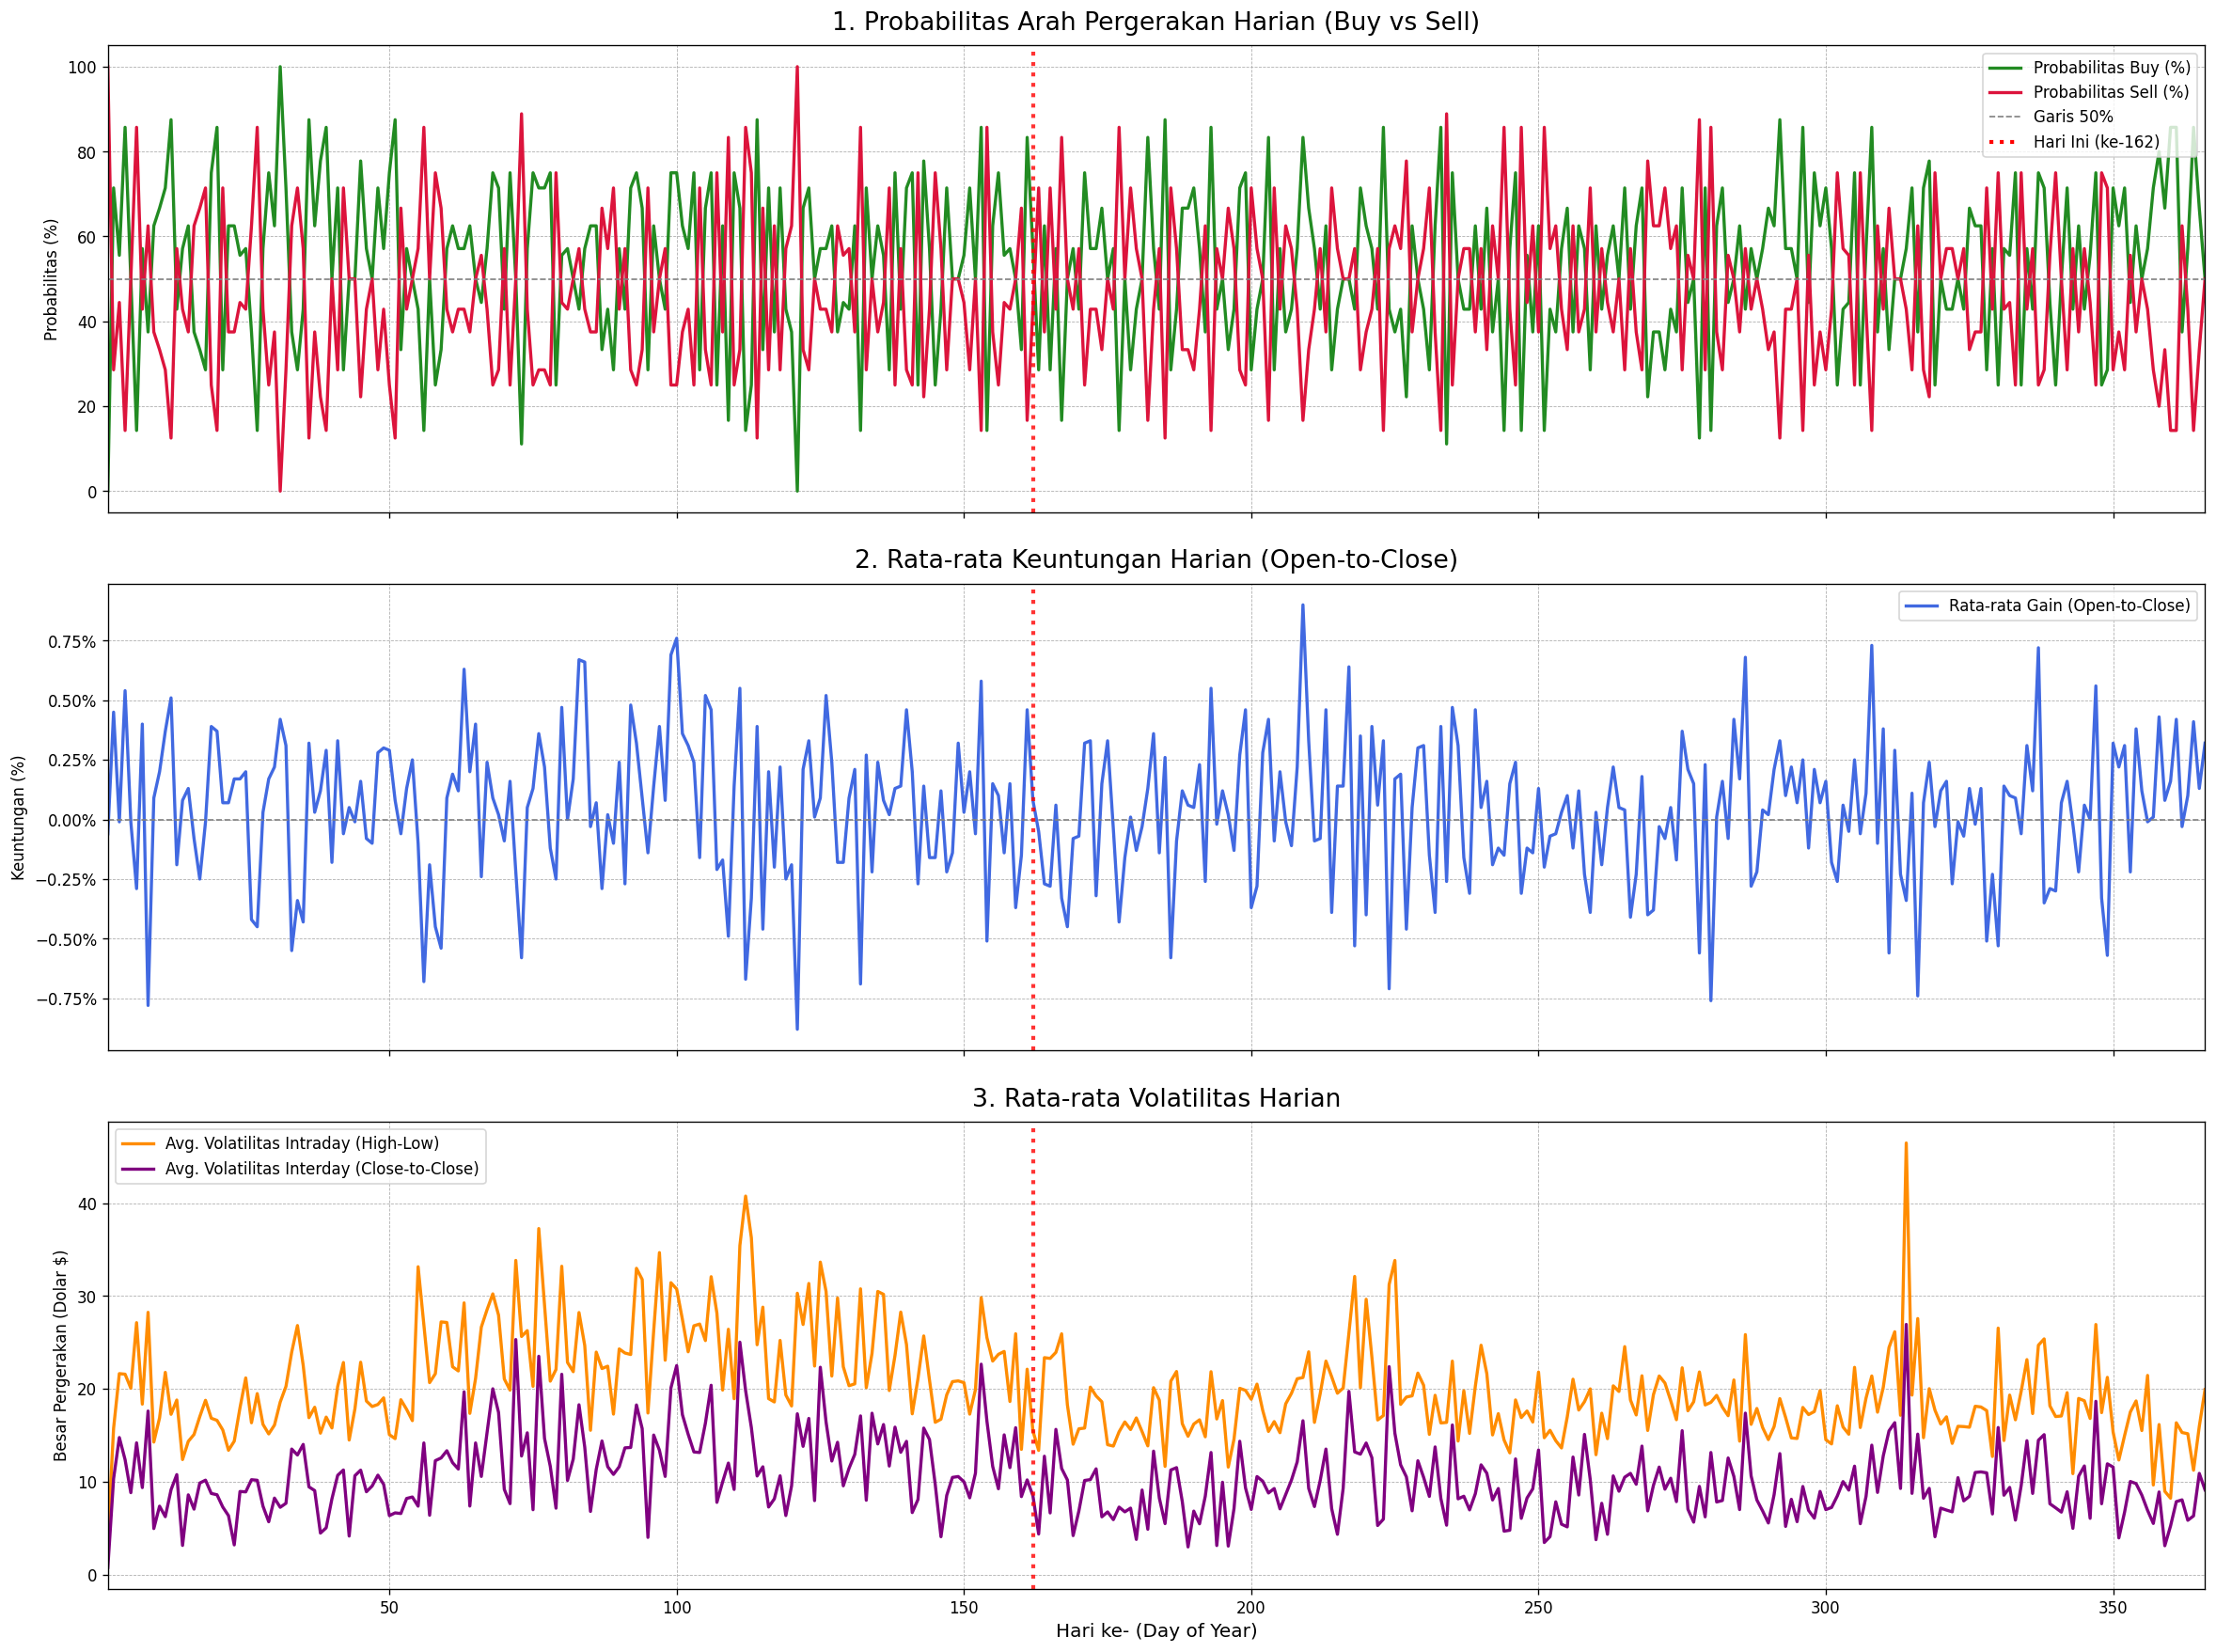

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import os
from datetime import datetime

# --- 1. Pengaturan Awal dan Kalkulasi Data ---
print("🔄 Memulai proses analisis, mohon tunggu...")

# Definisikan nama file dan path
input_csv_filename = "XAUUSD_Daily_201608090000_202506080000.csv"
base_input_name = os.path.splitext(input_csv_filename)[0]

# Dapatkan informasi hari ini
today = datetime.now()
day_of_year_num = today.timetuple().tm_yday
date_str = today.strftime('%Y-%m-%d')

# Buat path folder output
output_folder_name = f"{date_str} - {base_input_name}"
output_dir = os.path.join("Seasonal Data", output_folder_name)
os.makedirs(output_dir, exist_ok=True)

# Lakukan semua kalkulasi data terlebih dahulu
try:
    df = pd.read_csv(input_csv_filename, delim_whitespace=True)
except FileNotFoundError:
    print(f"\nError: Pastikan file '{input_csv_filename}' berada di direktori yang sama.")
    exit()

df.columns = [c.strip('<>') for c in df.columns]
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y.%m.%d')
df.set_index('DATE', inplace=True)

df['direction'] = np.where(df['CLOSE'] > df['OPEN'], 'Buy', 'Sell')
df['gain_%'] = ((df['CLOSE'] - df['OPEN']) / df['OPEN']) * 100
df['range_hl_$'] = df['HIGH'] - df['LOW']
df['abs_range_cc_$'] = df['CLOSE'].diff().abs()
df['year'] = df.index.year
df['day_of_year'] = df.index.dayofyear
df.dropna(inplace=True)

def classify_regime_daily(group):
    q1 = group['range_hl_$'].quantile(0.25)
    q3 = group['range_hl_$'].quantile(0.75)
    return group['range_hl_$'].apply(lambda x: 'Ranging' if x <= q1 else 'Trending' if x >= q3 else 'Average')
df['regime'] = df.groupby('year', group_keys=False).apply(classify_regime_daily)

latest_years = sorted(df['year'].unique())[-10:]
analysis_df = df[df['year'].isin(latest_years)].copy()

prob = analysis_df.groupby(['day_of_year', 'direction']).size().unstack(fill_value=0)
prob = prob.div(prob.sum(axis=1), axis=0) * 100
prob.columns = ['Buy_%', 'Sell_%']

agg_funcs = {
    'gain_%': 'mean',
    'range_hl_$': 'mean',
    'abs_range_cc_$': 'mean',
    'regime': lambda x: x.mode().iloc[0] if not x.empty else None
}
summary_stats = analysis_df.groupby('day_of_year').agg(agg_funcs)
summary_stats.rename(columns={
    'gain_%': 'Avg_Gain_%',
    'range_hl_$': 'Avg_Range_HL_$',
    'abs_range_cc_$': 'Avg_Abs_Range_CC_$',
    'regime': 'Dominant_Regime'
}, inplace=True)

final_table = pd.concat([prob, summary_stats], axis=1)
if 'Buy_%' not in final_table.columns: final_table['Buy_%'] = 0.0
if 'Sell_%' not in final_table.columns: final_table['Sell_%'] = 0.0
final_table = final_table[[
    'Buy_%', 'Sell_%', 'Avg_Gain_%', 'Avg_Range_HL_$', 'Avg_Abs_Range_CC_$', 'Dominant_Regime'
]].round(2)
final_table.index.name = 'Hari_ke'

# Ambil semua data yang relevan untuk hari ini
if day_of_year_num in final_table.index:
    today_data = final_table.loc[day_of_year_num]
    buy_prob = f"{today_data['Buy_%']}%"
    sell_prob = f"{today_data['Sell_%']}%"
    avg_gain = f"{today_data['Avg_Gain_%']}%"
    avg_range_hl = f"${today_data['Avg_Range_HL_$']}"
    avg_range_cc = f"${today_data['Avg_Abs_Range_CC_$']}"
    dom_regime = today_data['Dominant_Regime']
else:
    buy_prob, sell_prob, avg_gain, avg_range_hl, avg_range_cc, dom_regime = ('N/A',) * 6

print("✅ Proses kalkulasi data selesai.")


# --- 2. Tampilkan Header Output yang Sudah Lengkap ---
print("\n" + "="*60)
print(f"📊 Ringkasan Analisis Data Historis XAU/USD")
print(f"📅 Hari ini: {today.strftime('%A, %d %B %Y')} (Hari ke-{day_of_year_num})")
print("-"*60)
print("  Probabilitas Arah:")
print(f"    🟢 Probabilitas BUY: {buy_prob}")
print(f"    🔴 Probabilitas SELL: {sell_prob}")
print("\n  Karakteristik Historis Rata-rata untuk Hari Ini:")
print(f"    📈 Rata-rata Gain (O-C) : {avg_gain}")
print(f"    ↕️ Volatilitas Intraday (H-L) : {avg_range_hl}")
print(f"    ↔️ Volatilitas Interday (C-C): {avg_range_cc}")
print(f"    📋 Rezim Dominan          : {dom_regime}")
print("-"*60)
print(f"📂 Semua output detail akan disimpan di folder:")
print(f"   '{output_dir}'")
print("="*60)


# --- 3. Output Tabel Lengkap ---
print("\n📄 Menampilkan dan menyimpan tabel hasil analisis lengkap...")
print("\n" + "="*95)
print("              Tabel Analisis Harian Lengkap XAU/USD (Range dalam Dolar, Data 10 Tahun Terakhir)")
print("="*95)
print(final_table.to_string())
print("="*95)

csv_filename = "XAUUSD_daily_full_analysis_table.csv"
csv_filepath = os.path.join(output_dir, csv_filename)
final_table.to_csv(csv_filepath)
print(f"\n✅ Tabel analisis lengkap telah disimpan di: '{csv_filepath}'")


# --- 4. Visualisasi Line Chart ---
print("\n🎨 Membuat visualisasi grafik garis...")
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 15), sharex=True, dpi=120)

# Panel 1
axes[0].plot(final_table.index, final_table['Buy_%'], label='Probabilitas Buy (%)', color='forestgreen', linewidth=2)
axes[0].plot(final_table.index, final_table['Sell_%'], label='Probabilitas Sell (%)', color='crimson', linewidth=2)
axes[0].axhline(50, color='gray', linestyle='--', linewidth=1, label='Garis 50%')
axes[0].set_title('1. Probabilitas Arah Pergerakan Harian (Buy vs Sell)', fontsize=16, pad=10)
axes[0].set_ylabel('Probabilitas (%)')
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Panel 2
axes[1].plot(final_table.index, final_table['Avg_Gain_%'], label='Rata-rata Gain (Open-to-Close)', color='royalblue', linewidth=2)
axes[1].axhline(0, color='gray', linestyle='--', linewidth=1)
axes[1].set_title('2. Rata-rata Keuntungan Harian (Open-to-Close)', fontsize=16, pad=10)
axes[1].set_ylabel('Keuntungan (%)')
axes[1].legend()
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[1].yaxis.set_major_formatter(mticker.PercentFormatter())

# Panel 3
axes[2].plot(final_table.index, final_table['Avg_Range_HL_$'], label='Avg. Volatilitas Intraday (High-Low)', color='darkorange', linewidth=2)
axes[2].plot(final_table.index, final_table['Avg_Abs_Range_CC_$'], label='Avg. Volatilitas Interday (Close-to-Close)', color='purple', linewidth=2)
axes[2].set_title('3. Rata-rata Volatilitas Harian', fontsize=16, pad=10)
axes[2].set_ylabel('Besar Pergerakan (Dolar $)')
axes[2].legend(loc='upper left')
axes[2].grid(True, which='both', linestyle='--', linewidth=0.5)

# Menambahkan garis vertikal untuk hari ini di semua panel
for ax in axes:
    ax.axvline(x=day_of_year_num, color='red', linestyle=':', linewidth=2.5, alpha=0.8)

axes[0].plot([], [], color='red', linestyle=':', linewidth=2.5, label=f'Hari Ini (ke-{day_of_year_num})')
axes[0].legend()

# Pengaturan Umum
plt.xlabel('Hari ke- (Day of Year)', fontsize=12)
plt.xlim(1, 366)
plt.tight_layout(pad=2.0)

chart_filename = "XAUUSD_daily_analysis_charts.png"
chart_filepath = os.path.join(output_dir, chart_filename)
plt.savefig(chart_filepath, dpi=300)
print(f"✅ Grafik telah disimpan di: '{chart_filepath}'")
plt.show()

🔄 Memulai proses analisis dengan rezim yang disederhanakan...
✅ Proses kalkulasi data selesai.

📊 Ringkasan Analisis Data Historis XAU/USD
📅 Hari ini: Wednesday, 11 June 2025 (Hari ke-162)
------------------------------------------------------------
  Probabilitas Arah:
    🟢 Probabilitas BUY: 57.14%
    🔴 Probabilitas SELL: 42.86%

  Karakteristik Historis Rata-rata untuk Hari Ini:
    📈 Rata-rata Gain (O-C) : 0.08%
    ↕️ Volatilitas Intraday (H-L) : $15.47
    ↔️ Volatilitas Interday (C-C): $8.5
    📋 Rezim Dominan          : Ranging
------------------------------------------------------------
📂 Semua output detail akan disimpan di folder:
   'Seasonal Data/2025-06-11 - XAUUSD_Daily_201608090000_202506080000'

📄 Menampilkan dan menyimpan tabel hasil analisis lengkap...

              Tabel Analisis Harian Lengkap XAU/USD (Range dalam Dolar, Data 10 Tahun Terakhir)
          Buy_%  Sell_%  Avg_Gain_%  Avg_Range_HL_$  Avg_Abs_Range_CC_$ Dominant_Regime
Hari_ke                         

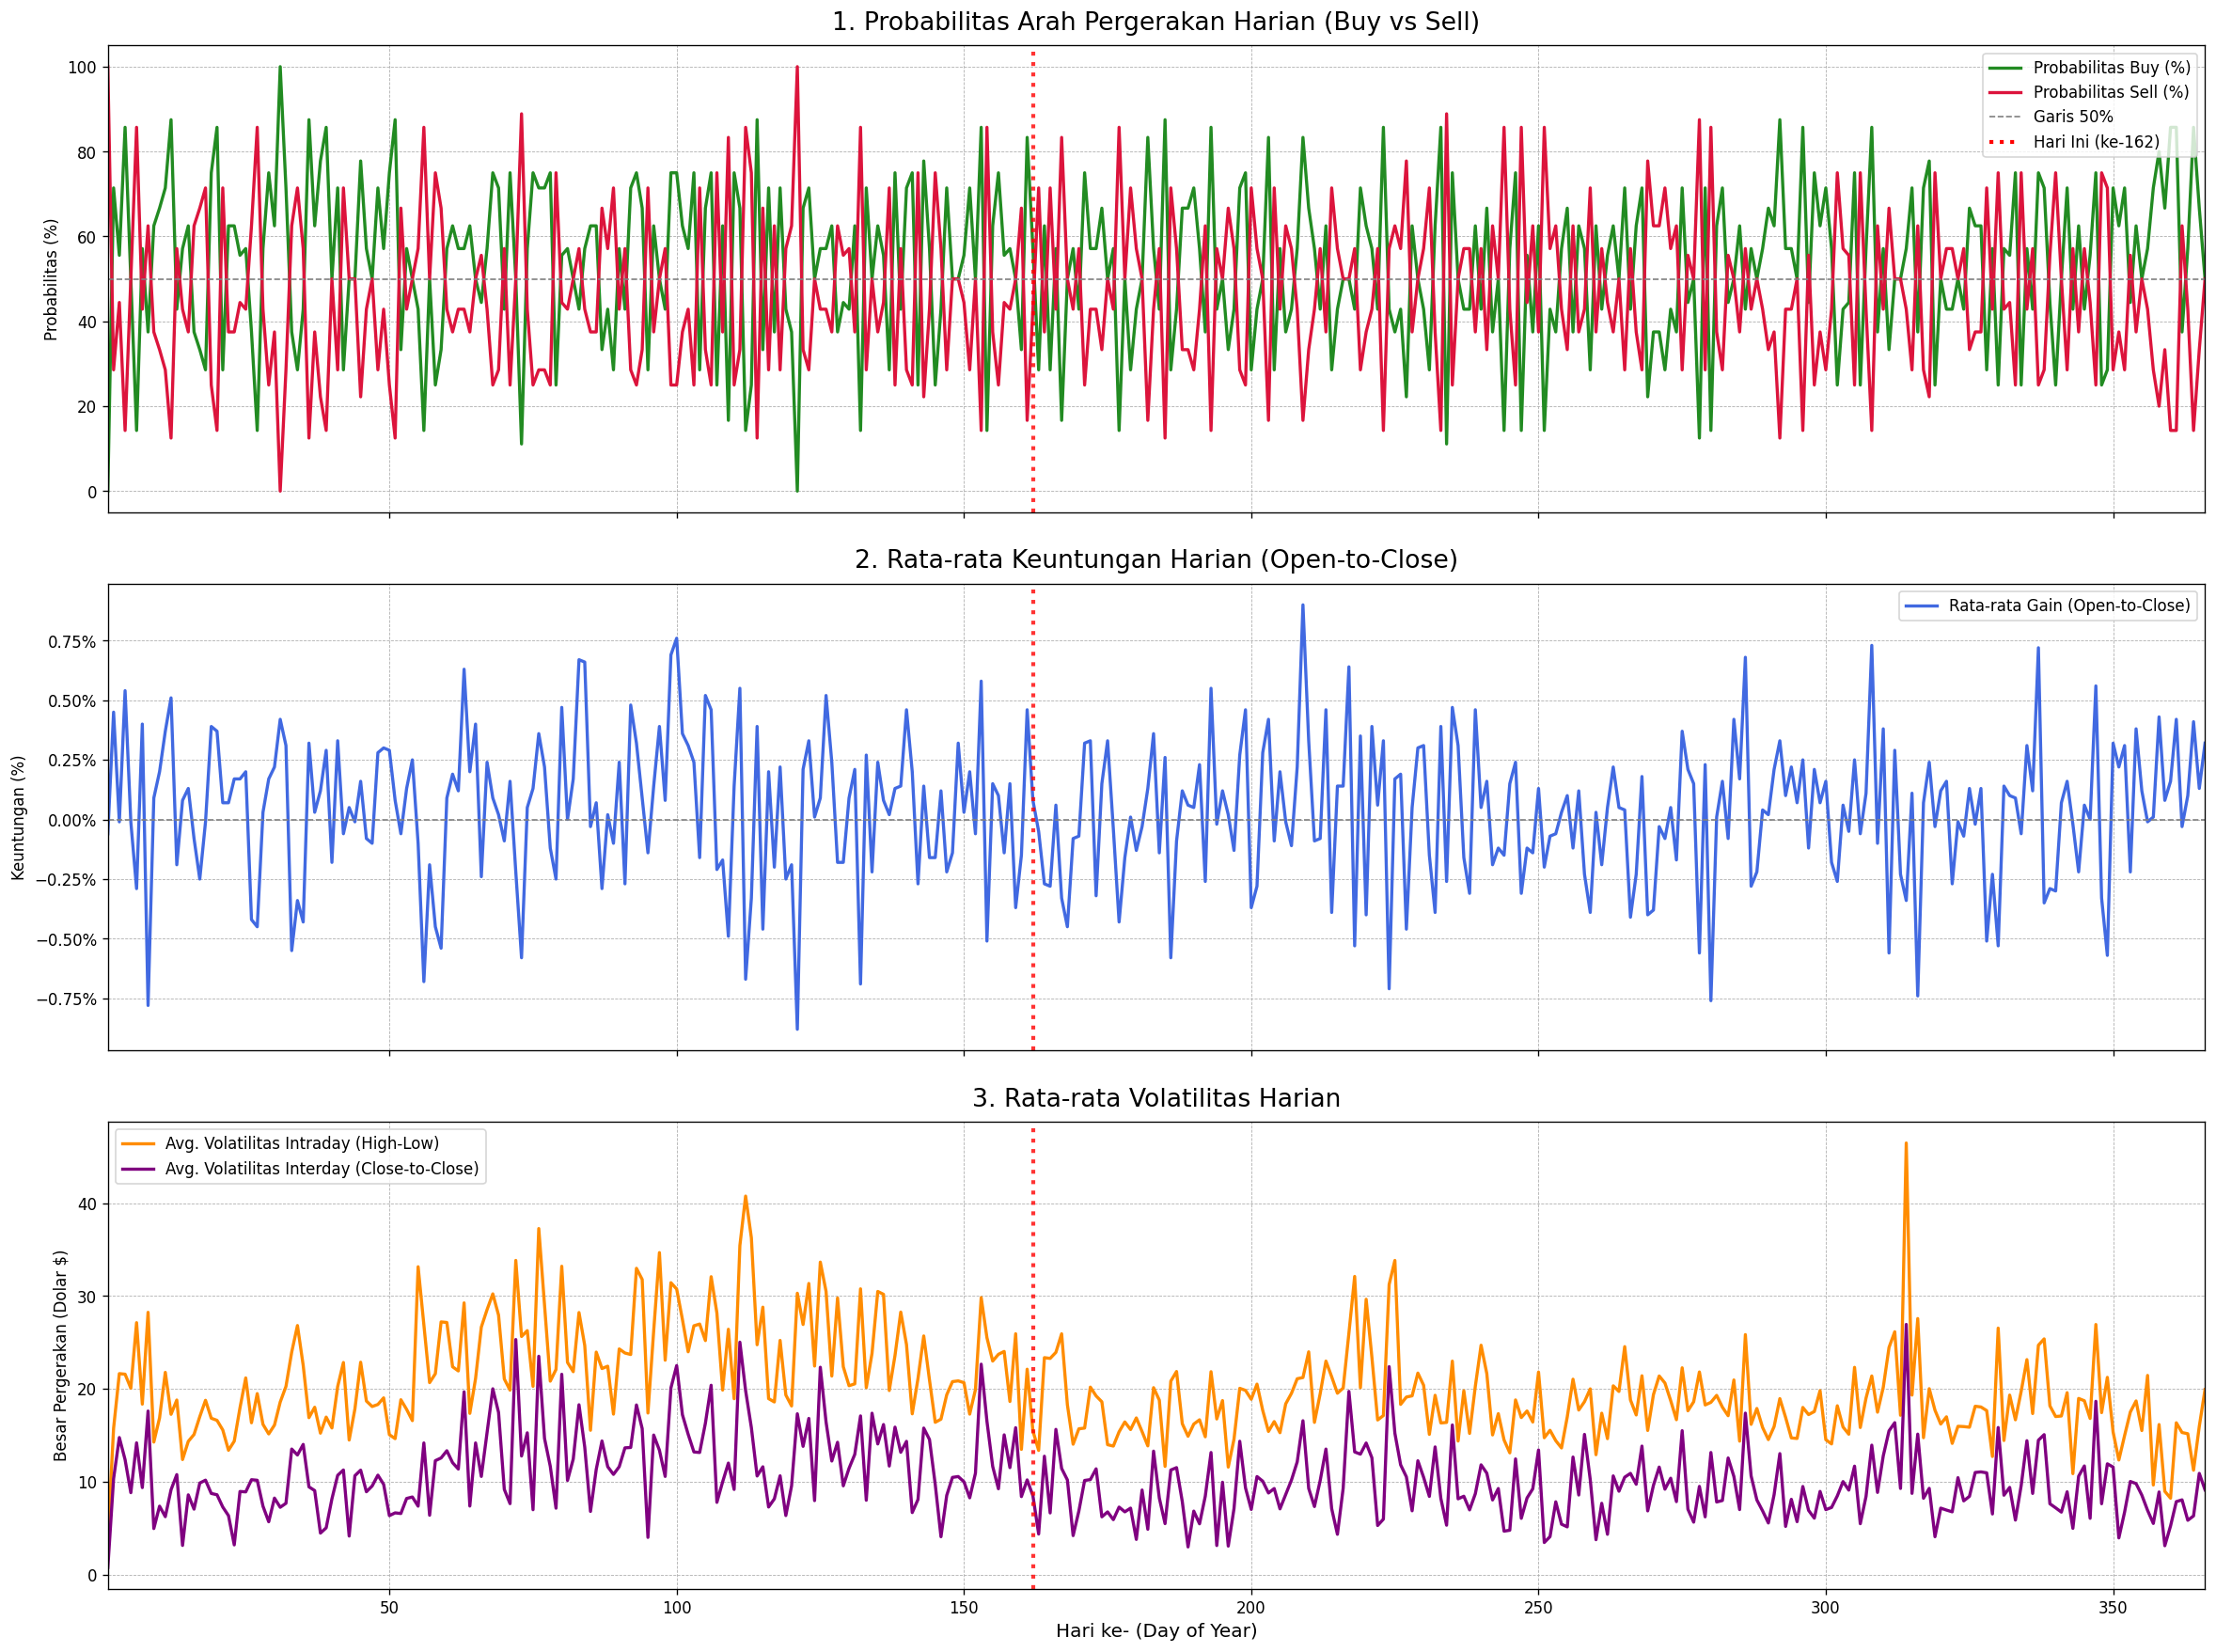

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import os
from datetime import datetime

# --- 1. Pengaturan Awal dan Kalkulasi Data ---
print("🔄 Memulai proses analisis dengan rezim yang disederhanakan...")

# Definisikan nama file dan path
input_csv_filename = "XAUUSD_Daily_201608090000_202506080000.csv"
base_input_name = os.path.splitext(input_csv_filename)[0]

# Dapatkan informasi hari ini
today = datetime.now()
day_of_year_num = today.timetuple().tm_yday
date_str = today.strftime('%Y-%m-%d')

# Buat path folder output
output_folder_name = f"{date_str} - {base_input_name}"
output_dir = os.path.join("Seasonal Data", output_folder_name)
os.makedirs(output_dir, exist_ok=True)

# Lakukan semua kalkulasi data terlebih dahulu
try:
    df = pd.read_csv(input_csv_filename, delim_whitespace=True)
except FileNotFoundError:
    print(f"\nError: Pastikan file '{input_csv_filename}' berada di direktori yang sama.")
    exit()

df.columns = [c.strip('<>') for c in df.columns]
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y.%m.%d')
df.set_index('DATE', inplace=True)

df['direction'] = np.where(df['CLOSE'] > df['OPEN'], 'Buy', 'Sell')
df['gain_%'] = ((df['CLOSE'] - df['OPEN']) / df['OPEN']) * 100
df['range_hl_$'] = df['HIGH'] - df['LOW']
df['abs_range_cc_$'] = df['CLOSE'].diff().abs()
df['year'] = df.index.year
df['day_of_year'] = df.index.dayofyear
df.dropna(inplace=True)

# >>> PERUBAHAN DI SINI: Menyederhanakan fungsi klasifikasi rezim
def classify_regime_daily(group):
    """Klasifikasikan hari sebagai 'Ranging' atau 'Trending' berdasarkan median volatilitas tahunan."""
    median_range = group['range_hl_$'].quantile(0.5)
    return group['range_hl_$'].apply(lambda x: 'Ranging' if x < median_range else 'Trending')

df['regime'] = df.groupby('year', group_keys=False).apply(classify_regime_daily)

latest_years = sorted(df['year'].unique())[-10:]
analysis_df = df[df['year'].isin(latest_years)].copy()

prob = analysis_df.groupby(['day_of_year', 'direction']).size().unstack(fill_value=0)
prob = prob.div(prob.sum(axis=1), axis=0) * 100
prob.columns = ['Buy_%', 'Sell_%']

agg_funcs = {
    'gain_%': 'mean',
    'range_hl_$': 'mean',
    'abs_range_cc_$': 'mean',
    'regime': lambda x: x.mode().iloc[0] if not x.empty else None
}
summary_stats = analysis_df.groupby('day_of_year').agg(agg_funcs)
summary_stats.rename(columns={
    'gain_%': 'Avg_Gain_%',
    'range_hl_$': 'Avg_Range_HL_$',
    'abs_range_cc_$': 'Avg_Abs_Range_CC_$',
    'regime': 'Dominant_Regime'
}, inplace=True)

final_table = pd.concat([prob, summary_stats], axis=1)
if 'Buy_%' not in final_table.columns: final_table['Buy_%'] = 0.0
if 'Sell_%' not in final_table.columns: final_table['Sell_%'] = 0.0
final_table = final_table[[
    'Buy_%', 'Sell_%', 'Avg_Gain_%', 'Avg_Range_HL_$', 'Avg_Abs_Range_CC_$', 'Dominant_Regime'
]].round(2)
final_table.index.name = 'Hari_ke'

# Ambil semua data yang relevan untuk hari ini
if day_of_year_num in final_table.index:
    today_data = final_table.loc[day_of_year_num]
    buy_prob = f"{today_data['Buy_%']}%"
    sell_prob = f"{today_data['Sell_%']}%"
    avg_gain = f"{today_data['Avg_Gain_%']}%"
    avg_range_hl = f"${today_data['Avg_Range_HL_$']}"
    avg_range_cc = f"${today_data['Avg_Abs_Range_CC_$']}"
    dom_regime = today_data['Dominant_Regime']
else:
    buy_prob, sell_prob, avg_gain, avg_range_hl, avg_range_cc, dom_regime = ('N/A',) * 6

print("✅ Proses kalkulasi data selesai.")


# --- 2. Tampilkan Header Output ---
print("\n" + "="*60)
print(f"📊 Ringkasan Analisis Data Historis XAU/USD")
print(f"📅 Hari ini: {today.strftime('%A, %d %B %Y')} (Hari ke-{day_of_year_num})")
print("-"*60)
print("  Probabilitas Arah:")
print(f"    🟢 Probabilitas BUY: {buy_prob}")
print(f"    🔴 Probabilitas SELL: {sell_prob}")
print("\n  Karakteristik Historis Rata-rata untuk Hari Ini:")
print(f"    📈 Rata-rata Gain (O-C) : {avg_gain}")
print(f"    ↕️ Volatilitas Intraday (H-L) : {avg_range_hl}")
print(f"    ↔️ Volatilitas Interday (C-C): {avg_range_cc}")
print(f"    📋 Rezim Dominan          : {dom_regime}")
print("-"*60)
print(f"📂 Semua output detail akan disimpan di folder:")
print(f"   '{output_dir}'")
print("="*60)


# --- 3. Output Tabel Lengkap ---
print("\n📄 Menampilkan dan menyimpan tabel hasil analisis lengkap...")
print("\n" + "="*95)
print("              Tabel Analisis Harian Lengkap XAU/USD (Range dalam Dolar, Data 10 Tahun Terakhir)")
print("="*95)
print(final_table.to_string())
print("="*95)

csv_filename = "XAUUSD_daily_full_analysis_table.csv"
csv_filepath = os.path.join(output_dir, csv_filename)
final_table.to_csv(csv_filepath)
print(f"\n✅ Tabel analisis lengkap telah disimpan di: '{csv_filepath}'")


# --- 4. Visualisasi Line Chart ---
print("\n🎨 Membuat visualisasi grafik garis...")
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 15), sharex=True, dpi=120)

# Panel 1
axes[0].plot(final_table.index, final_table['Buy_%'], label='Probabilitas Buy (%)', color='forestgreen', linewidth=2)
axes[0].plot(final_table.index, final_table['Sell_%'], label='Probabilitas Sell (%)', color='crimson', linewidth=2)
axes[0].axhline(50, color='gray', linestyle='--', linewidth=1, label='Garis 50%')
axes[0].set_title('1. Probabilitas Arah Pergerakan Harian (Buy vs Sell)', fontsize=16, pad=10)
axes[0].set_ylabel('Probabilitas (%)')
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Panel 2
axes[1].plot(final_table.index, final_table['Avg_Gain_%'], label='Rata-rata Gain (Open-to-Close)', color='royalblue', linewidth=2)
axes[1].axhline(0, color='gray', linestyle='--', linewidth=1)
axes[1].set_title('2. Rata-rata Keuntungan Harian (Open-to-Close)', fontsize=16, pad=10)
axes[1].set_ylabel('Keuntungan (%)')
axes[1].legend()
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[1].yaxis.set_major_formatter(mticker.PercentFormatter())

# Panel 3
axes[2].plot(final_table.index, final_table['Avg_Range_HL_$'], label='Avg. Volatilitas Intraday (High-Low)', color='darkorange', linewidth=2)
axes[2].plot(final_table.index, final_table['Avg_Abs_Range_CC_$'], label='Avg. Volatilitas Interday (Close-to-Close)', color='purple', linewidth=2)
axes[2].set_title('3. Rata-rata Volatilitas Harian', fontsize=16, pad=10)
axes[2].set_ylabel('Besar Pergerakan (Dolar $)')
axes[2].legend(loc='upper left')
axes[2].grid(True, which='both', linestyle='--', linewidth=0.5)

# Menambahkan garis vertikal untuk hari ini di semua panel
for ax in axes:
    ax.axvline(x=day_of_year_num, color='red', linestyle=':', linewidth=2.5, alpha=0.8)

axes[0].plot([], [], color='red', linestyle=':', linewidth=2.5, label=f'Hari Ini (ke-{day_of_year_num})')
axes[0].legend()

# Pengaturan Umum
plt.xlabel('Hari ke- (Day of Year)', fontsize=12)
plt.xlim(1, 366)
plt.tight_layout(pad=2.0)

chart_filename = "XAUUSD_daily_analysis_charts.png"
chart_filepath = os.path.join(output_dir, chart_filename)
plt.savefig(chart_filepath, dpi=300)
print(f"✅ Grafik telah disimpan di: '{chart_filepath}'")
plt.show()

🔄 Memulai proses analisis dengan chart arah & rezim yang dinormalisasi...
✅ Proses kalkulasi data selesai.

📊 Ringkasan Analisis Data Historis
📅 Hari ini: Wednesday, 11 June 2025 (Hari ke-162)
------------------------------------------------------------
  Probabilitas Arah:
    🟢 Probabilitas BUY: 57.14%
    🔴 Probabilitas SELL: 42.86%

  Karakteristik Historis Rata-rata untuk Hari Ini:
    📈 Rata-rata Gain (O-C) : 0.08%
    ↕️ Volatilitas Intraday (H-L) : $15.47
    ↔️ Volatilitas Interday (C-C): $8.5
    📋 Rezim Dominan          : Ranging
------------------------------------------------------------
📂 Semua output detail akan disimpan di folder:
   'Seasonal Data/2025-06-11 - XAUUSD_Daily_201608090000_202506080000'

✅ Tabel analisis lengkap telah disimpan di: 'Seasonal Data/2025-06-11 - XAUUSD_Daily_201608090000_202506080000/XAUUSD_daily_full_analysis_table.csv'

🎨 Membuat visualisasi grafik garis...
✅ Grafik telah disimpan di: 'Seasonal Data/2025-06-11 - XAUUSD_Daily_201608090000_202

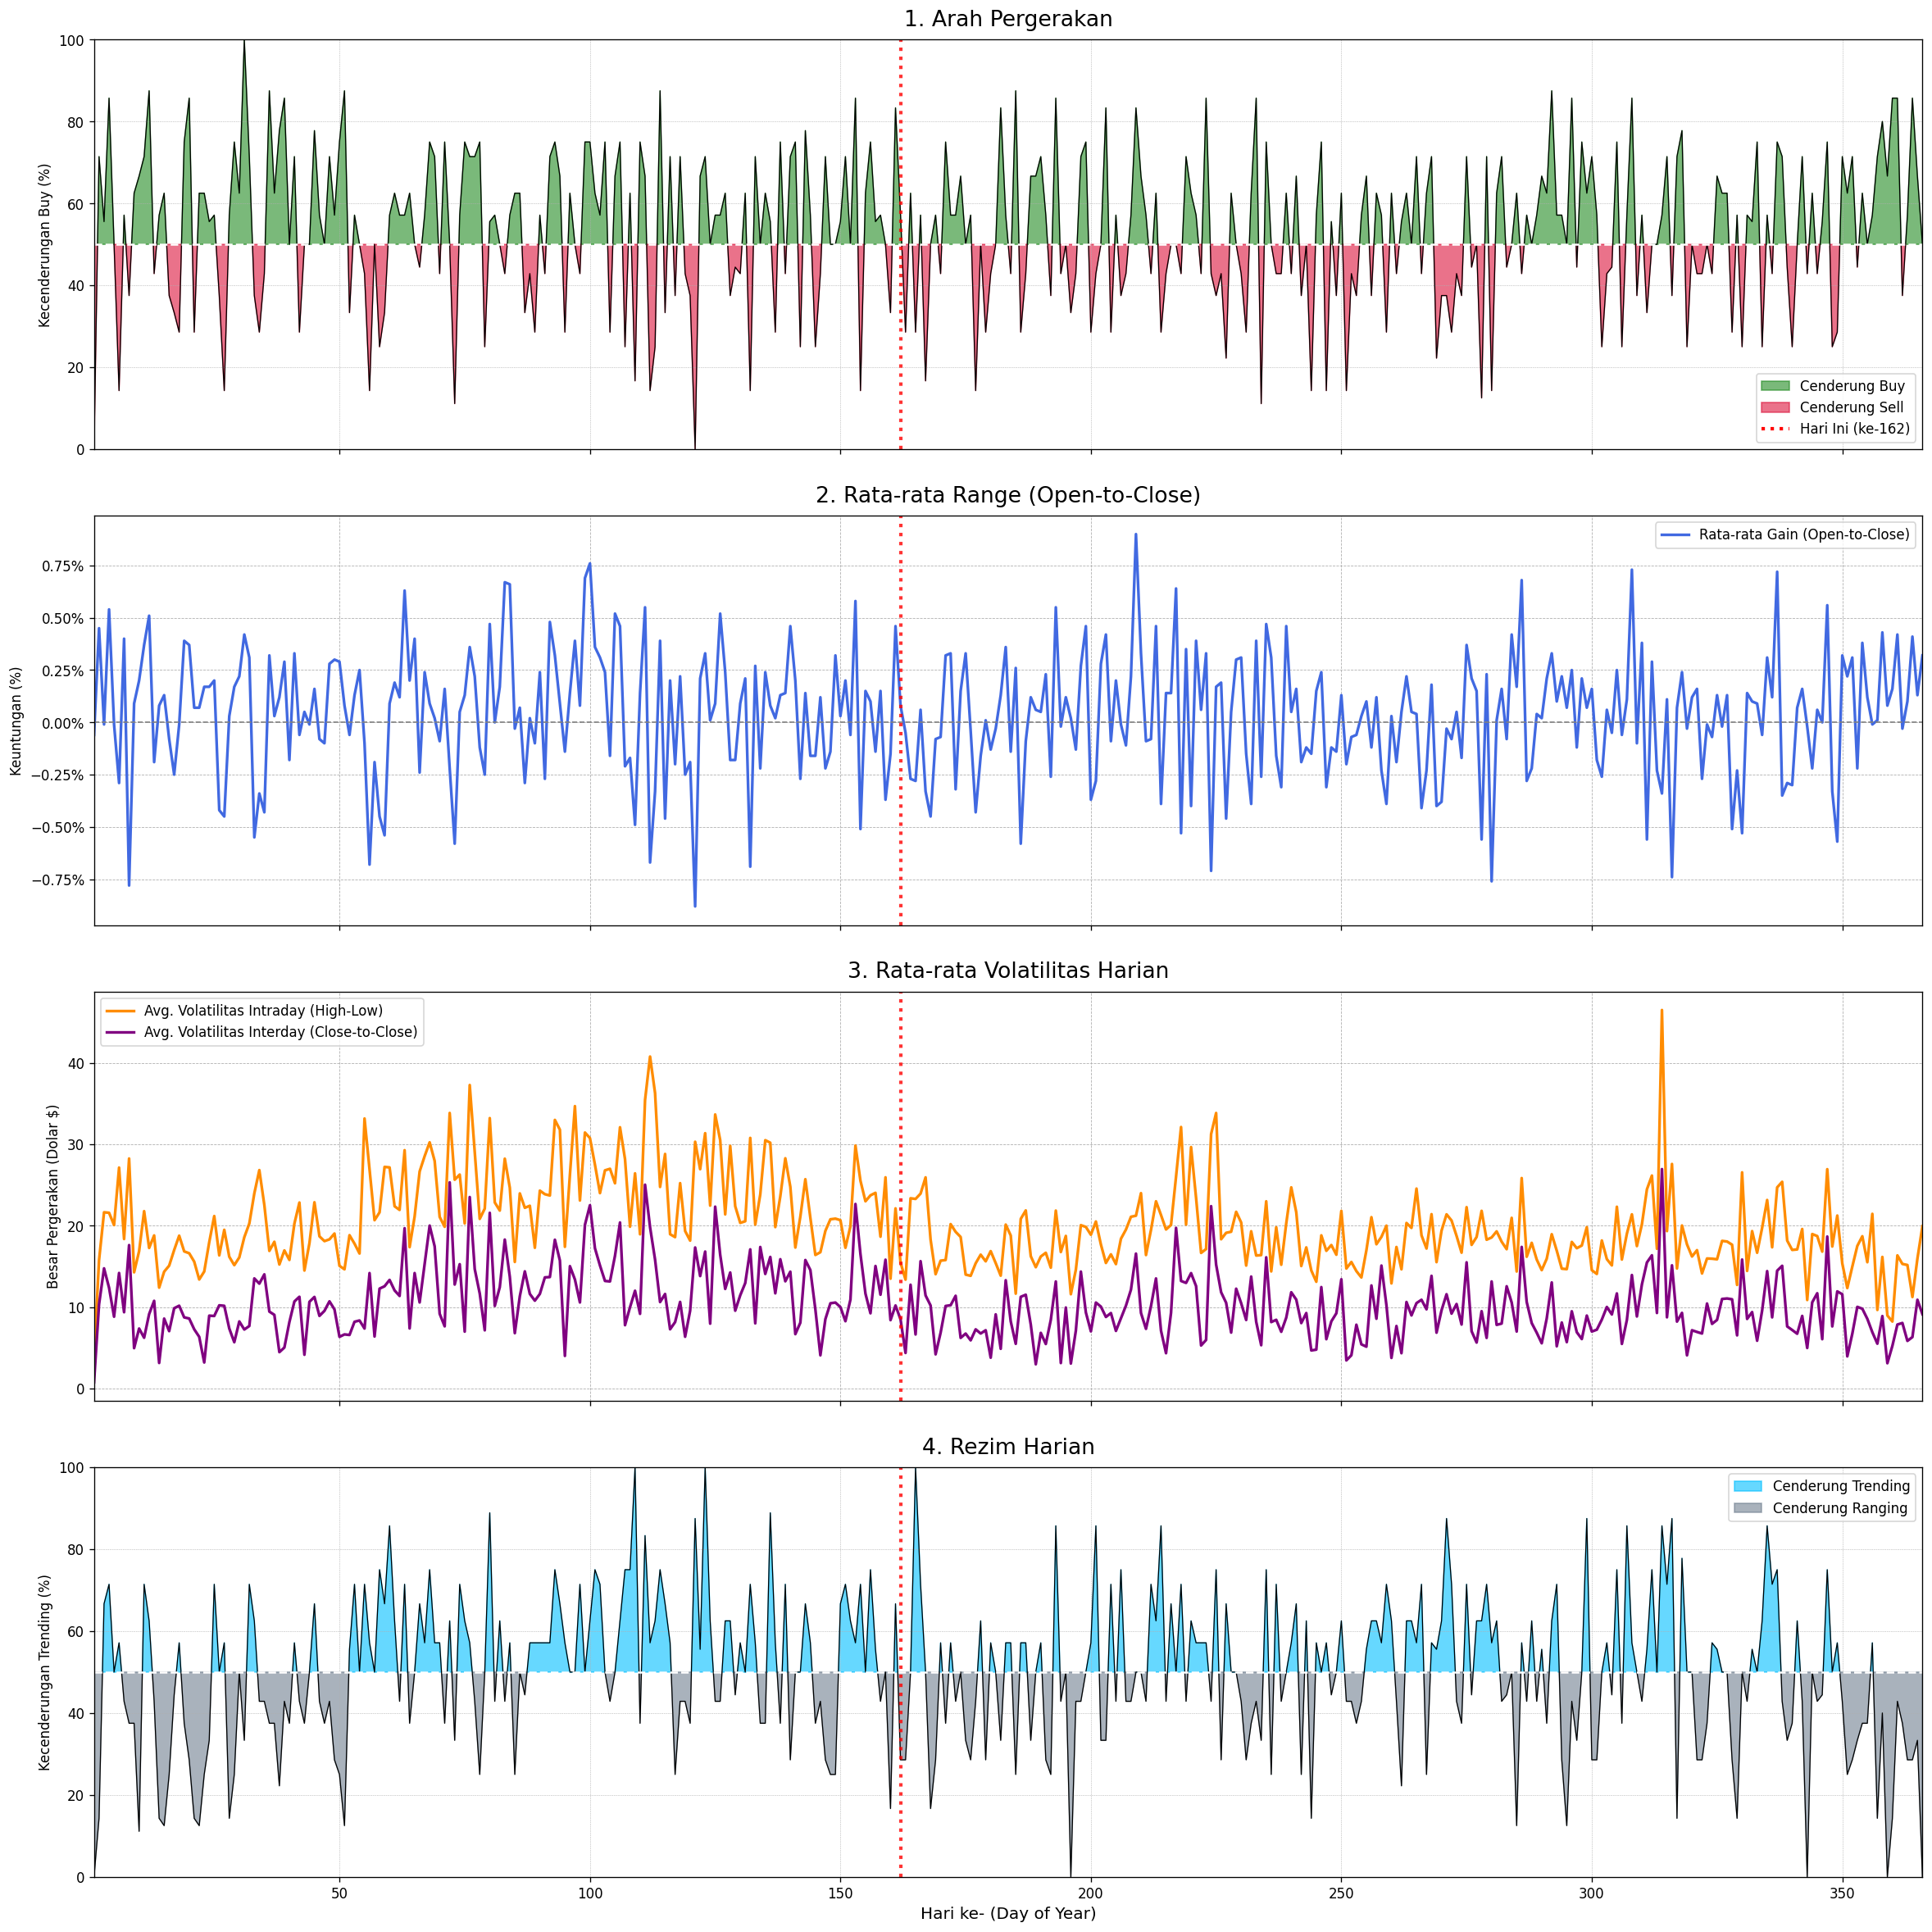

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import os
from datetime import datetime

# --- 1. Pengaturan Awal dan Kalkulasi Data ---
print("🔄 Memulai proses analisis dengan chart arah & rezim yang dinormalisasi...")

# Definisikan nama file dan path
input_csv_filename = "XAUUSD_Daily_201608090000_202506080000.csv"
base_input_name = os.path.splitext(input_csv_filename)[0]

# Dapatkan informasi hari ini
today = datetime.now()
day_of_year_num = today.timetuple().tm_yday
date_str = today.strftime('%Y-%m-%d')

# Buat path folder output
output_folder_name = f"{date_str} - {base_input_name}"
output_dir = os.path.join("Seasonal Data", output_folder_name)
os.makedirs(output_dir, exist_ok=True)

# Lakukan semua kalkulasi data terlebih dahulu
try:
    df = pd.read_csv(input_csv_filename, delim_whitespace=True)
except FileNotFoundError:
    print(f"\nError: Pastikan file '{input_csv_filename}' berada di direktori yang sama.")
    exit()

df.columns = [c.strip('<>') for c in df.columns]
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y.%m.%d')
df.set_index('DATE', inplace=True)

df['direction'] = np.where(df['CLOSE'] > df['OPEN'], 'Buy', 'Sell')
df['gain_%'] = ((df['CLOSE'] - df['OPEN']) / df['OPEN']) * 100
df['range_hl_$'] = df['HIGH'] - df['LOW']
df['abs_range_cc_$'] = df['CLOSE'].diff().abs()
df['year'] = df.index.year
df['day_of_year'] = df.index.dayofyear
df.dropna(inplace=True)

def classify_regime_daily(group):
    median_range = group['range_hl_$'].quantile(0.5)
    return group['range_hl_$'].apply(lambda x: 'Ranging' if x < median_range else 'Trending')

df['regime'] = df.groupby('year', group_keys=False).apply(classify_regime_daily)

latest_years = sorted(df['year'].unique())[-10:]
analysis_df = df[df['year'].isin(latest_years)].copy()

prob_direction = analysis_df.groupby(['day_of_year', 'direction']).size().unstack(fill_value=0)
prob_direction = prob_direction.div(prob_direction.sum(axis=1), axis=0) * 100
prob_direction.columns = ['Buy_%', 'Sell_%']

prob_regime = analysis_df.groupby(['day_of_year', 'regime']).size().unstack(fill_value=0)
prob_regime = prob_regime.div(prob_regime.sum(axis=1), axis=0) * 100
prob_regime.rename(columns={'Trending': 'Trending_%', 'Ranging': 'Ranging_%'}, inplace=True)

agg_funcs = {
    'gain_%': 'mean',
    'range_hl_$': 'mean',
    'abs_range_cc_$': 'mean',
    'regime': lambda x: x.mode().iloc[0] if not x.empty else None
}
summary_stats = analysis_df.groupby('day_of_year').agg(agg_funcs)
summary_stats.rename(columns={
    'gain_%': 'Avg_Gain_%',
    'range_hl_$': 'Avg_Range_HL_$',
    'abs_range_cc_$': 'Avg_Abs_Range_CC_$',
    'regime': 'Dominant_Regime'
}, inplace=True)

final_table = pd.concat([prob_direction, prob_regime, summary_stats], axis=1)

for col in ['Buy_%', 'Sell_%', 'Trending_%', 'Ranging_%']:
    if col not in final_table.columns:
        final_table[col] = 0.0
final_table.fillna(0, inplace=True)
final_table = final_table[[
    'Buy_%', 'Sell_%', 'Trending_%', 'Ranging_%', 'Avg_Gain_%', 'Avg_Range_HL_$', 'Avg_Abs_Range_CC_$', 'Dominant_Regime'
]].round(2)
final_table.index.name = 'Hari_ke'

if day_of_year_num in final_table.index:
    today_data = final_table.loc[day_of_year_num]
    buy_prob = f"{today_data['Buy_%']}%"
    sell_prob = f"{today_data['Sell_%']}%"
    avg_gain = f"{today_data['Avg_Gain_%']}%"
    avg_range_hl = f"${today_data['Avg_Range_HL_$']}"
    avg_range_cc = f"${today_data['Avg_Abs_Range_CC_$']}"
    dom_regime = today_data['Dominant_Regime']
else:
    buy_prob, sell_prob, avg_gain, avg_range_hl, avg_range_cc, dom_regime = ('N/A',) * 6

print("✅ Proses kalkulasi data selesai.")


# --- 2. Tampilkan Header Output ---
print("\n" + "="*60)
print(f"📊 Ringkasan Analisis Data Historis")
print(f"📅 Hari ini: {today.strftime('%A, %d %B %Y')} (Hari ke-{day_of_year_num})")
print("-"*60)
print("  Probabilitas Arah:")
print(f"    🟢 Probabilitas BUY: {buy_prob}")
print(f"    🔴 Probabilitas SELL: {sell_prob}")
print("\n  Karakteristik Historis Rata-rata untuk Hari Ini:")
print(f"    📈 Rata-rata Gain (O-C) : {avg_gain}")
print(f"    ↕️ Volatilitas Intraday (H-L) : {avg_range_hl}")
print(f"    ↔️ Volatilitas Interday (C-C): {avg_range_cc}")
print(f"    📋 Rezim Dominan          : {dom_regime}")
print("-"*60)
print(f"📂 Semua output detail akan disimpan di folder:")
print(f"   '{output_dir}'")
print("="*60)


# --- 3. Output Tabel Lengkap ---
csv_filename = "XAUUSD_daily_full_analysis_table.csv"
csv_filepath = os.path.join(output_dir, csv_filename)
final_table.to_csv(csv_filepath)
print(f"\n✅ Tabel analisis lengkap telah disimpan di: '{csv_filepath}'")


# --- 4. Visualisasi Line Chart ---
print("\n🎨 Membuat visualisasi grafik garis...")
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20, 20), sharex=True, dpi=120)
x_axis = final_table.index

# >>> PERUBAHAN DI SINI: Panel 1 diubah menjadi Normalisasi Arah
ax0 = axes[0]
y_buy = final_table['Buy_%']
ax0.plot(x_axis, y_buy, color='black', linewidth=0.75)
ax0.fill_between(x_axis, 50, y_buy, where=(y_buy >= 50), color='forestgreen', alpha=0.6, interpolate=True, label='Cenderung Buy')
ax0.fill_between(x_axis, y_buy, 50, where=(y_buy < 50), color='crimson', alpha=0.6, interpolate=True, label='Cenderung Sell')
ax0.axhline(50, color='white', linestyle='--', linewidth=1.5)
ax0.set_title('1. Arah Pergerakan', fontsize=16, pad=10)
ax0.set_ylabel('Kecenderungan Buy (%)')
ax0.set_ylim(0, 100)
ax0.grid(True, which='both', linestyle='--', linewidth=0.3)


# Panel 2: Rata-rata Keuntungan Harian (Tidak Berubah)
axes[1].plot(x_axis, final_table['Avg_Gain_%'], label='Rata-rata Gain (Open-to-Close)', color='royalblue', linewidth=2)
axes[1].axhline(0, color='gray', linestyle='--', linewidth=1)
axes[1].set_title('2. Rata-rata Range (Open-to-Close)', fontsize=16, pad=10)
axes[1].set_ylabel('Keuntungan (%)')
axes[1].legend()
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[1].yaxis.set_major_formatter(mticker.PercentFormatter())

# Panel 3: Rata-rata Volatilitas Harian (Tidak Berubah)
axes[2].plot(x_axis, final_table['Avg_Range_HL_$'], label='Avg. Volatilitas Intraday (High-Low)', color='darkorange', linewidth=2)
axes[2].plot(x_axis, final_table['Avg_Abs_Range_CC_$'], label='Avg. Volatilitas Interday (Close-to-Close)', color='purple', linewidth=2)
axes[2].set_title('3. Rata-rata Volatilitas Harian', fontsize=16, pad=10)
axes[2].set_ylabel('Besar Pergerakan (Dolar $)')
axes[2].legend(loc='upper left')
axes[2].grid(True, which='both', linestyle='--', linewidth=0.5)

# Panel 4: Normalisasi Rezim (Tidak Berubah)
ax4 = axes[3]
y_trending = final_table['Trending_%']
ax4.plot(x_axis, y_trending, color='black', linewidth=0.75)
ax4.fill_between(x_axis, 50, y_trending, where=(y_trending >= 50), color='deepskyblue', alpha=0.6, interpolate=True, label='Cenderung Trending')
ax4.fill_between(x_axis, y_trending, 50, where=(y_trending < 50), color='slategray', alpha=0.6, interpolate=True, label='Cenderung Ranging')
ax4.axhline(50, color='white', linestyle='--', linewidth=1.5)
ax4.set_title('4. Rezim Harian', fontsize=16, pad=10)
ax4.set_ylabel('Kecenderungan Trending (%)')
ax4.set_ylim(0, 100)
ax4.legend()
ax4.grid(True, which='both', linestyle='--', linewidth=0.3)


# Menambahkan garis vertikal untuk hari ini di semua panel
for ax in axes:
    ax.axvline(x=day_of_year_num, color='red', linestyle=':', linewidth=2.5, alpha=0.8)

# Tambahkan legenda untuk garis 'Hari Ini' dan 'Cenderung Buy/Sell'
ax0.plot([], [], color='red', linestyle=':', linewidth=2.5, label=f'Hari Ini (ke-{day_of_year_num})')
ax0.legend()

# Pengaturan Umum
plt.xlabel('Hari ke- (Day of Year)', fontsize=12)
plt.xlim(1, 366)
plt.tight_layout(pad=2.0)

chart_filename = "XAUUSD_daily_analysis_charts.png"
chart_filepath = os.path.join(output_dir, chart_filename)
plt.savefig(chart_filepath, dpi=300)
print(f"✅ Grafik telah disimpan di: '{chart_filepath}'")
plt.show()

🔄 Memulai proses analisis seasonal (Week of Year) vs. Hit S/R...
✅ Analisis Selesai.

📊 Analisis Seasonal: Probabilitas Rata-Rata Pivot Mingguan Tercapai per Pekan
                         (Data 10 Tahun Terakhir)

--- Ringkasan untuk Pekan Ini (Pekan ke-24) ---
  🔴 Probabilitas Hit R3: 0.00%
  🔴 Probabilitas Hit R2: 8.33%
  🔴 Probabilitas Hit R1: 18.75%
  ---------------------------------
  🟢 Probabilitas Hit S1: 54.17%
  🟢 Probabilitas Hit S2: 52.08%
  🟢 Probabilitas Hit S3: 12.50%
------------------------------------------


--- Tabel Lengkap (Semua Pekan) ---

          hit_R1  hit_S1  hit_R2  hit_S2  hit_R3  hit_S3
Pekan_ke                                                
1          74.00   10.00   66.00    6.00   54.00    2.00
2          72.22   24.07   64.81   22.22   50.00   20.37
3          55.56    5.56   51.85    1.85   33.33    0.00
4          53.70   27.78   35.19   14.81   12.96    3.70
5          61.11   31.48   48.15   22.22   31.48   11.11
6          50.00   40.74   37.

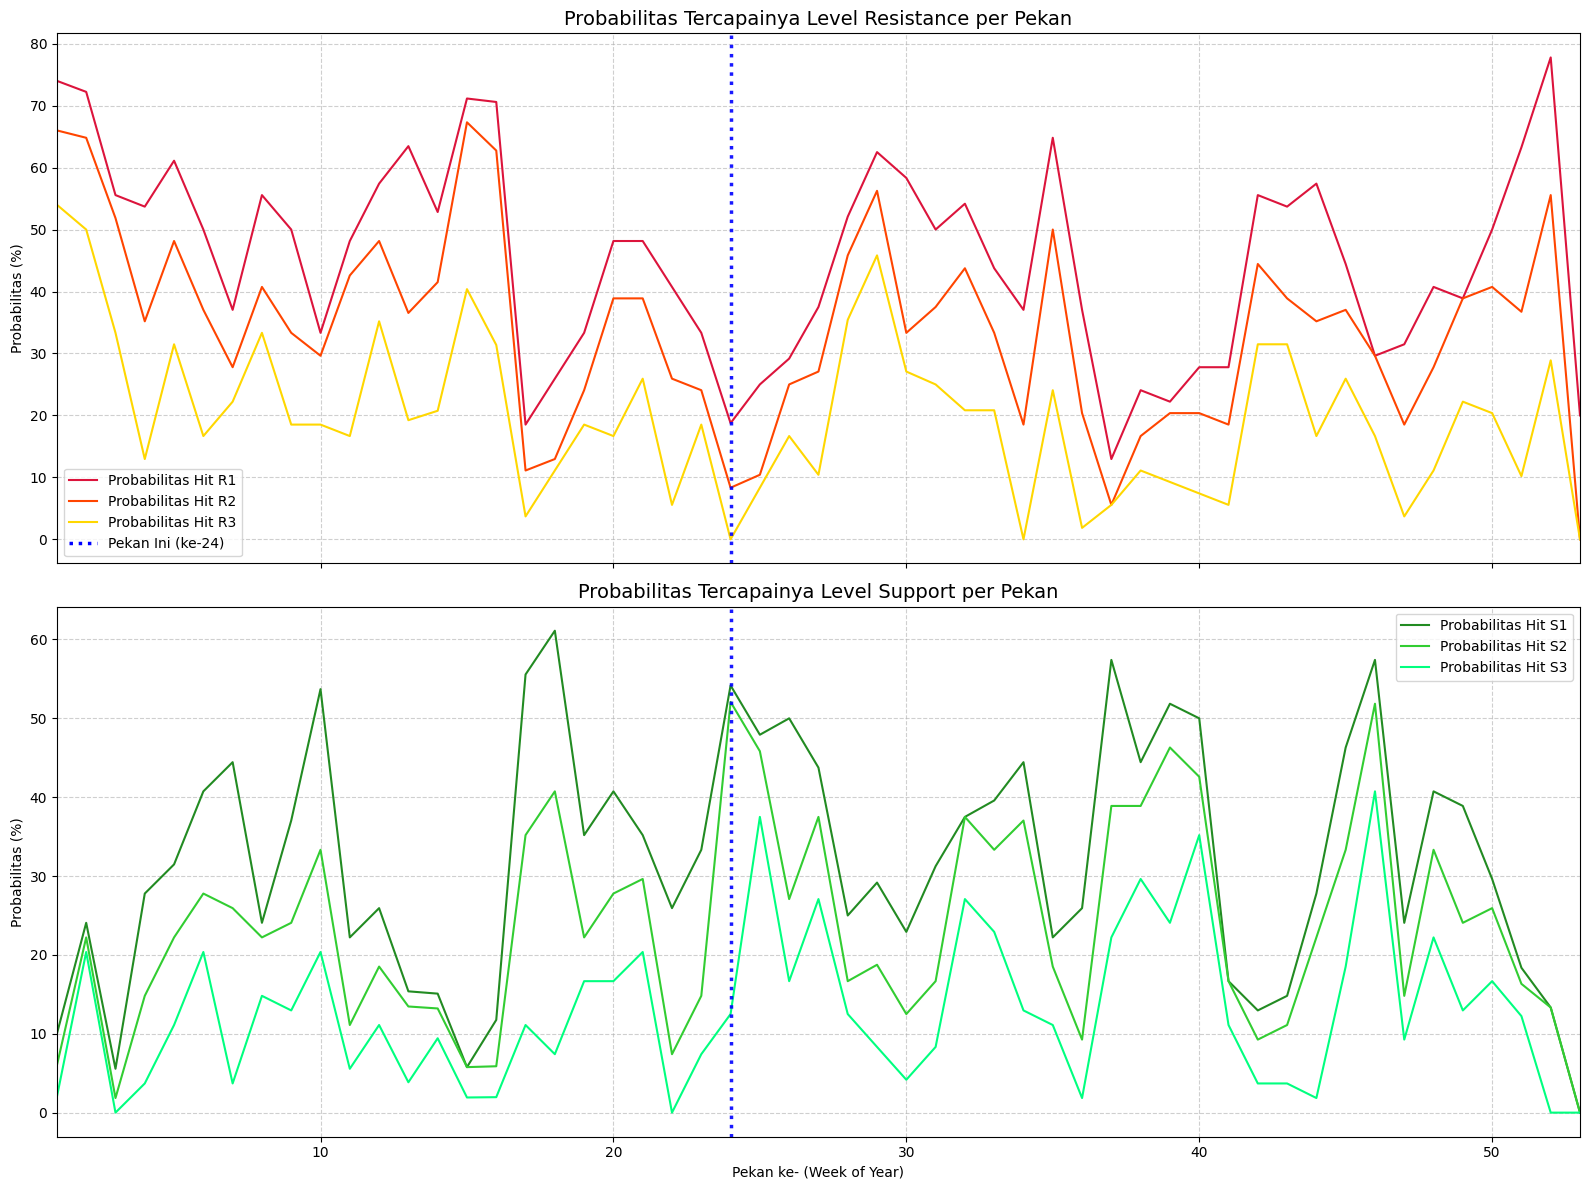

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

# --- 1. Fungsi untuk Analisis ---
def analyze_seasonal_pivot_hits(file_path):
    """
    Menganalisis probabilitas rata-rata (seasonal) level Fibonacci Pivot Point
    mingguan tercapai untuk setiap pekan dalam setahun (week of year).
    """
    # --- Dapatkan informasi waktu saat ini ---
    today = datetime.now()
    current_week_num = today.isocalendar().week
    
    print("🔄 Memulai proses analisis seasonal (Week of Year) vs. Hit S/R...")
    
    # Muat data
    try:
        df = pd.read_csv(file_path, delim_whitespace=True)
    except FileNotFoundError:
        print(f"\nError: Pastikan file '{file_path}' berada di direktori yang sama.")
        return

    # --- Persiapan Data dan Perhitungan Pivot Mingguan ---
    df.columns = [c.strip('<>') for c in df.columns]
    df['DATE'] = pd.to_datetime(df['DATE'], format='%Y.%m.%d')
    df.set_index('DATE', inplace=True)

    weekly_df = df.resample('W-MON').agg({'HIGH': 'max', 'LOW': 'min', 'CLOSE': 'last'})
    prev_w_high = weekly_df['HIGH'].shift(1)
    prev_w_low = weekly_df['LOW'].shift(1)
    prev_w_close = weekly_df['CLOSE'].shift(1)
    pivot = (prev_w_high + prev_w_low + prev_w_close) / 3
    prev_w_range = prev_w_high - prev_w_low
    
    pivot_cols = ['R1', 'S1', 'R2', 'S2', 'R3', 'S3']
    weekly_df['R1'] = pivot + (prev_w_range * 0.382)
    weekly_df['S1'] = pivot - (prev_w_range * 0.382)
    weekly_df['R2'] = pivot + (prev_w_range * 0.618)
    weekly_df['S2'] = pivot - (prev_w_range * 0.618)
    weekly_df['R3'] = pivot + (prev_w_range * 1.000)
    weekly_df['S3'] = pivot - (prev_w_range * 1.000)

    daily_pivots = weekly_df[pivot_cols].reindex(df.index, method='ffill')
    df = df.join(daily_pivots)
    
    df['year'] = df.index.year
    latest_years = sorted(df['year'].unique())[-10:]
    df = df[df['year'].isin(latest_years)].copy()
    df.dropna(inplace=True)

    # --- Deteksi Sentuhan Level Pivot Mingguan ---
    df['hit_R1'] = df['HIGH'] >= df['R1']
    df['hit_R2'] = df['HIGH'] >= df['R2']
    df['hit_R3'] = df['HIGH'] >= df['R3']
    df['hit_S1'] = df['LOW'] <= df['S1']
    df['hit_S2'] = df['LOW'] <= df['S2']
    df['hit_S3'] = df['LOW'] <= df['S3']

    # --- Agregasi per Pekan ---
    df['week_of_year'] = df.index.isocalendar().week
    hit_columns = ['hit_R1', 'hit_S1', 'hit_R2', 'hit_S2', 'hit_R3', 'hit_S3']
    seasonal_hit_rate = df.groupby('week_of_year')[hit_columns].mean() * 100

    result_table = seasonal_hit_rate.round(2)
    result_table.index.name = "Pekan_ke"
    
    print("✅ Analisis Selesai.")
    
    # --- Tampilkan Hasil Tabel ---
    print("\n" + "="*80)
    print("📊 Analisis Seasonal: Probabilitas Rata-Rata Pivot Mingguan Tercapai per Pekan")
    print("                         (Data 10 Tahun Terakhir)")
    print("="*80)
    
    # >>> PERUBAHAN DI SINI: Menampilkan detail untuk pekan saat ini
    print(f"\n--- Ringkasan untuk Pekan Ini (Pekan ke-{current_week_num}) ---")
    if current_week_num in result_table.index:
        current_week_data = result_table.loc[current_week_num]
        print(f"  🔴 Probabilitas Hit R3: {current_week_data['hit_R3']:.2f}%")
        print(f"  🔴 Probabilitas Hit R2: {current_week_data['hit_R2']:.2f}%")
        print(f"  🔴 Probabilitas Hit R1: {current_week_data['hit_R1']:.2f}%")
        print("  ---------------------------------")
        print(f"  🟢 Probabilitas Hit S1: {current_week_data['hit_S1']:.2f}%")
        print(f"  🟢 Probabilitas Hit S2: {current_week_data['hit_S2']:.2f}%")
        print(f"  🟢 Probabilitas Hit S3: {current_week_data['hit_S3']:.2f}%")
    else:
        print("  Data untuk pekan ini tidak tersedia dalam set data historis.")
    print("------------------------------------------")

    print("\n\n--- Tabel Lengkap (Semua Pekan) ---\n")
    print(result_table.to_string())
    print("\n" + "="*80)
    
    # Simpan ke CSV
    try:
        output_folder = "Seasonal Data"
        os.makedirs(output_folder, exist_ok=True)
        filename = os.path.join(output_folder, "seasonal_pivot_hit_rate_by_week.csv")
        result_table.to_csv(filename)
        print(f"\n✅ Tabel ringkasan juga telah disimpan ke file: '{filename}'")
    except Exception as e:
        print(f"\nGagal menyimpan file CSV: {e}")

    # --- Visualisasi Grafik Garis ---
    print("\n🎨 Membuat visualisasi grafik garis...")
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12), sharex=True, dpi=100)

    # Panel 1: Resistance Levels
    axes[0].plot(result_table.index, result_table['hit_R1'], label='Probabilitas Hit R1', color='crimson')
    axes[0].plot(result_table.index, result_table['hit_R2'], label='Probabilitas Hit R2', color='orangered')
    axes[0].plot(result_table.index, result_table['hit_R3'], label='Probabilitas Hit R3', color='gold')
    axes[0].set_title('Probabilitas Tercapainya Level Resistance per Pekan', fontsize=14)
    axes[0].set_ylabel('Probabilitas (%)')
    axes[0].grid(True, linestyle='--', alpha=0.6)

    # Panel 2: Support Levels
    axes[1].plot(result_table.index, result_table['hit_S1'], label='Probabilitas Hit S1', color='forestgreen')
    axes[1].plot(result_table.index, result_table['hit_S2'], label='Probabilitas Hit S2', color='limegreen')
    axes[1].plot(result_table.index, result_table['hit_S3'], label='Probabilitas Hit S3', color='springgreen')
    axes[1].set_title('Probabilitas Tercapainya Level Support per Pekan', fontsize=14)
    axes[1].set_ylabel('Probabilitas (%)')
    axes[1].set_xlabel('Pekan ke- (Week of Year)')
    axes[1].legend()
    axes[1].grid(True, linestyle='--', alpha=0.6)
    
    # Menambahkan garis vertikal untuk pekan ini
    for ax in axes:
        ax.axvline(x=current_week_num, color='blue', linestyle=':', linewidth=2.5, alpha=0.9)

    # Tambahkan label untuk garis vertikal hanya pada legenda panel pertama
    axes[0].plot([], [], color='blue', linestyle=':', linewidth=2.5, label=f'Pekan Ini (ke-{current_week_num})')
    axes[0].legend()
    
    plt.xlim(1, 53)
    plt.tight_layout()
    
    try:
        chart_filename = os.path.join(output_folder, "seasonal_pivot_hit_rate_charts.png")
        plt.savefig(chart_filename, dpi=300)
        print(f"✅ Grafik telah disimpan sebagai: '{chart_filename}'")
    except Exception as e:
        print(f"\nGagal menyimpan grafik: {e}")
        
    plt.show()


# --- Jalankan Analisis ---
if __name__ == "__main__":
    input_file = "XAUUSD_Daily_201608090000_202506080000.csv"
    analyze_seasonal_pivot_hits(input_file)

✅ Grafik telah disimpan di: 'Seasonal Data/Weekly Seasonal Probability - XAUUSD_Daily_201608090000_202506080000.csv - 2025-06-11.png'


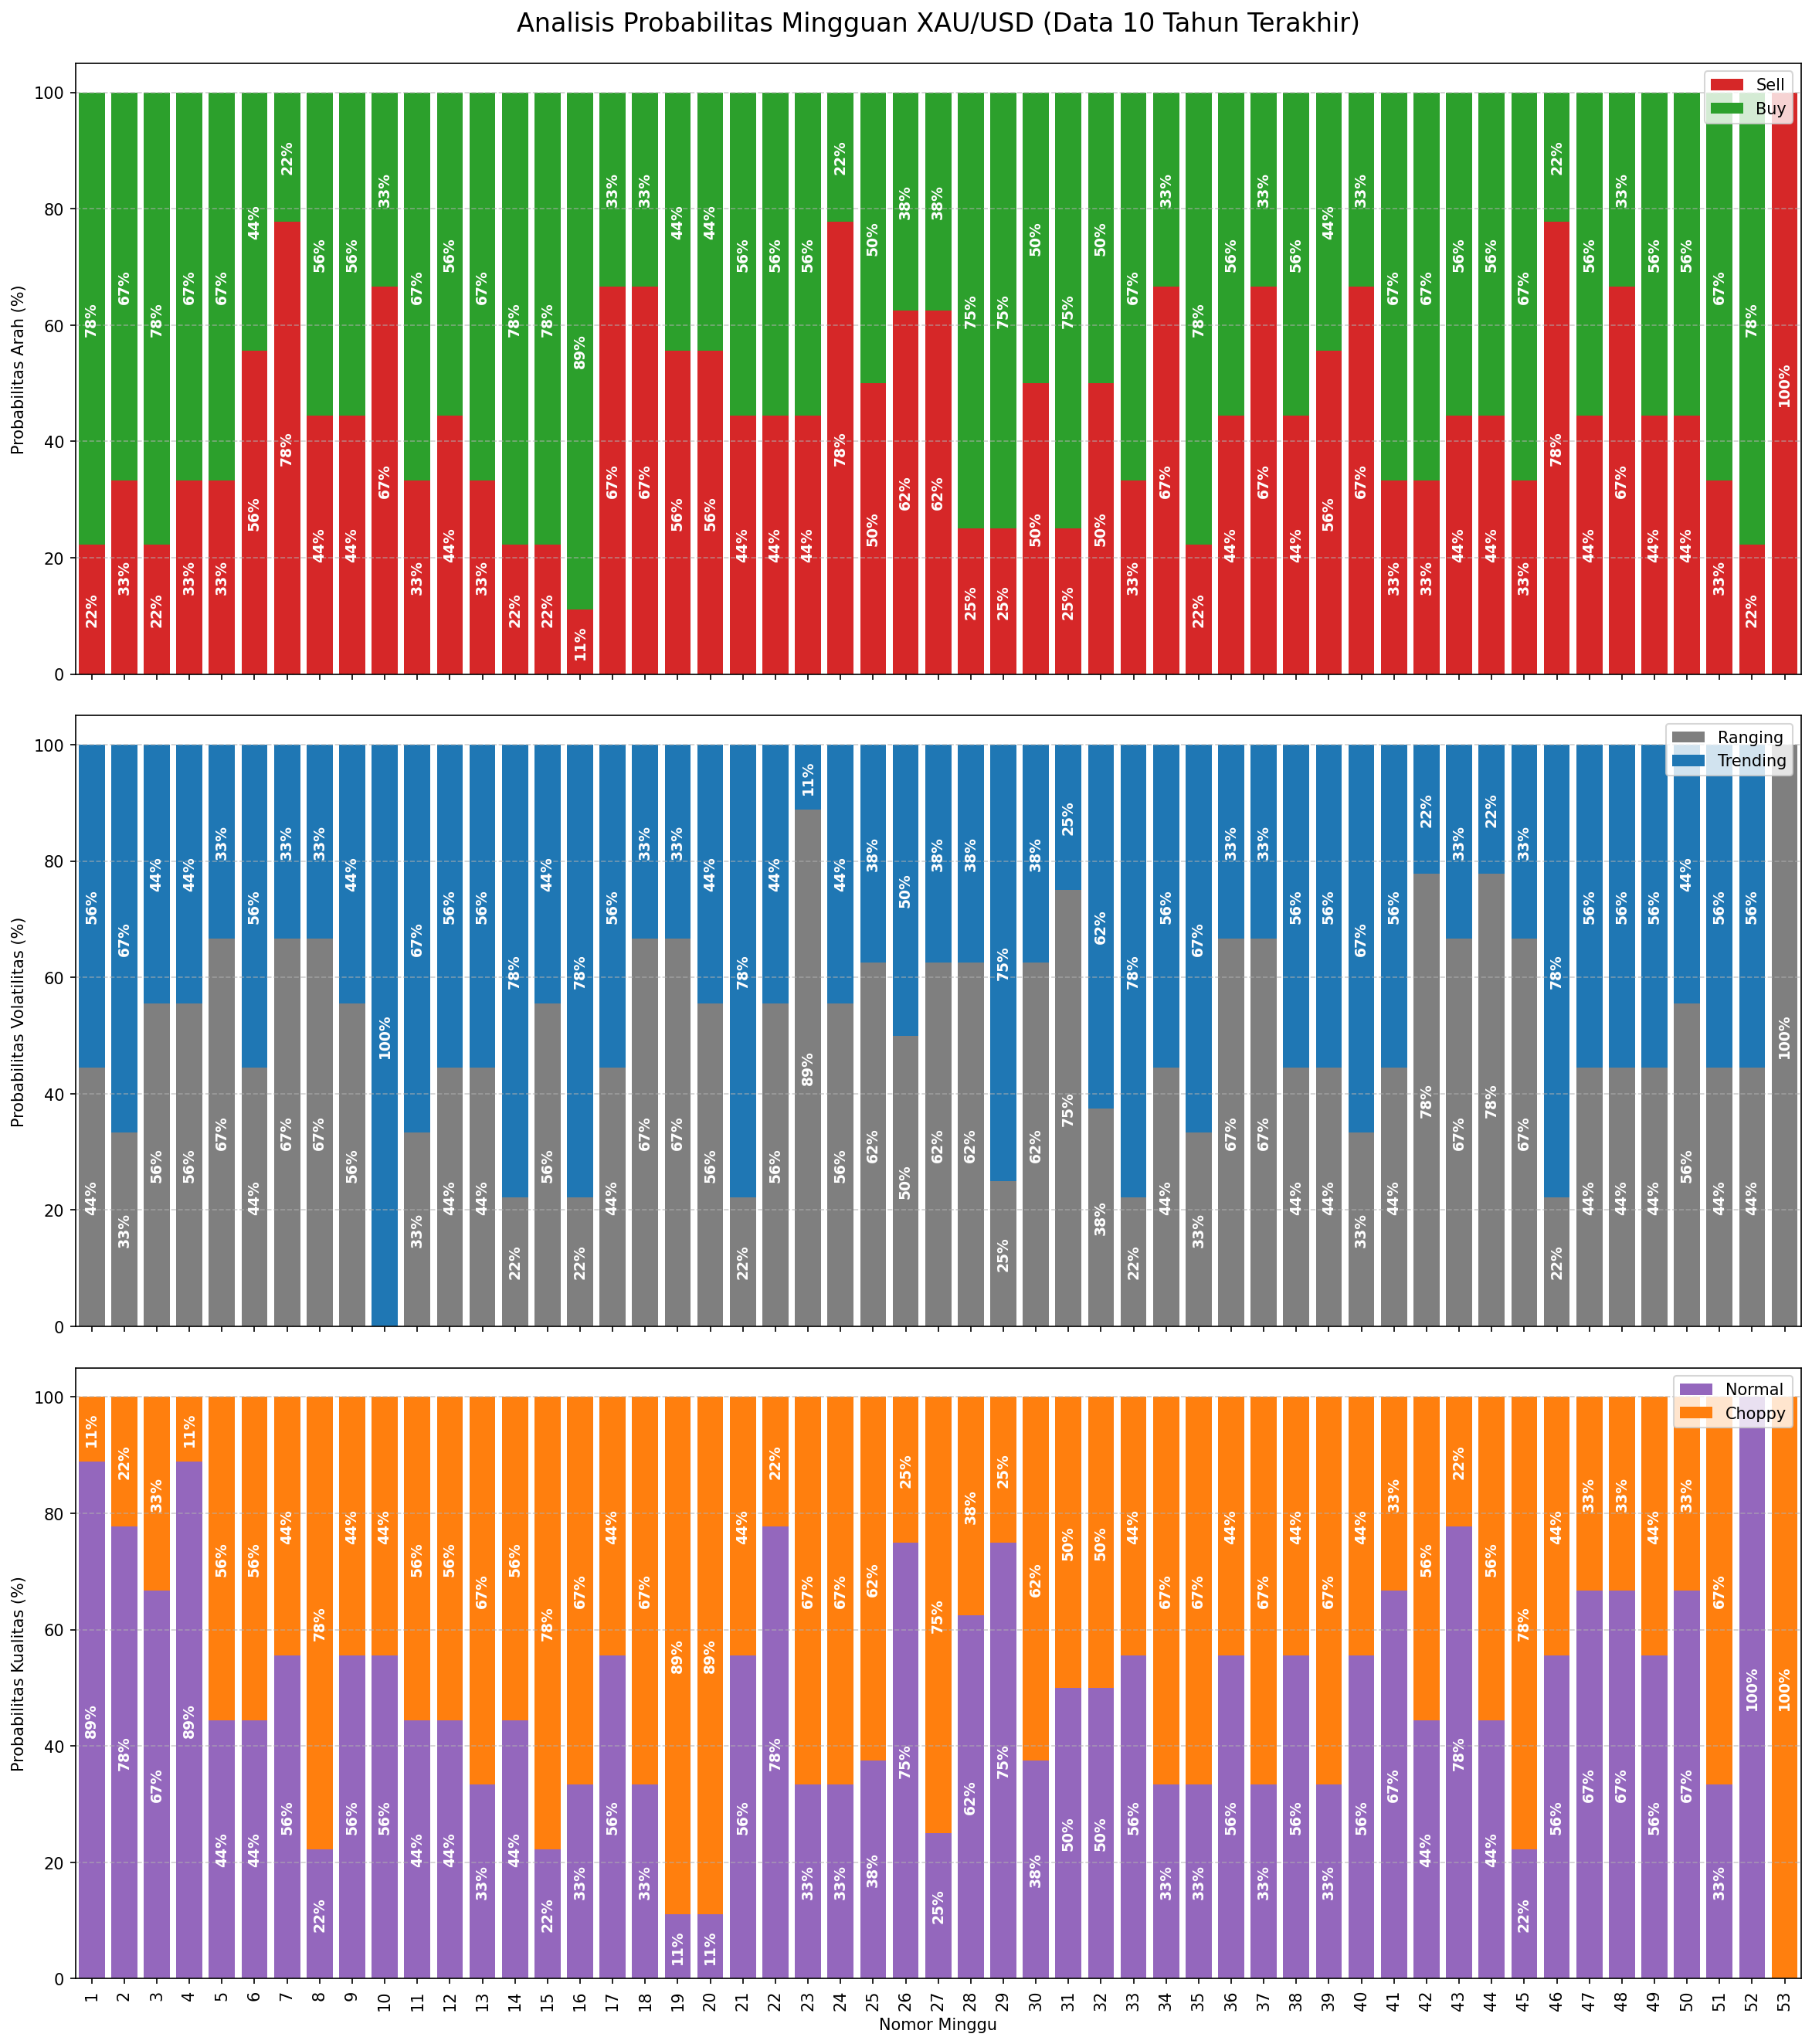

📊 Analisis Probabilitas Mingguan XAU/USD
📅 Hari ini (11 June 2025) adalah bagian dari minggu ke-24.

Ringkasan Probabilitas untuk Pekan Ini (Pekan ke-24)
Berdasarkan data historis 10 tahun terakhir:

--- 1. Probabilitas Arah ---
  🟢 Kecenderungan Buy : 22.22%
  🔴 Kecenderungan Sell: 77.78%

--- 2. Probabilitas Volatilitas ---
  🔵 Kecenderungan Trending: 44.44%
  ⚪ Kecenderungan Ranging : 55.56%

--- 3. Probabilitas Kualitas Pergerakan ---
  🟠 Kecenderungan Choppy: 66.67%
  🟡 Kecenderungan Normal: 33.33%

✅ Tabel probabilitas juga telah disimpan ke file Excel: 'Seasonal Data/Weekly Seasonal Probability - XAUUSD_Daily_201608090000_202506080000.csv - 2025-06-11.xlsx'


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

# --- 1. Pengaturan Awal (Folder & Nama File) ---
input_csv_filename = "XAUUSD_Daily_201608090000_202506080000.csv"
today_str = datetime.now().strftime('%Y-%m-%d')
output_folder = "Seasonal Data"

# Buat folder jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Buat nama file dasar untuk semua output
base_filename = f"Weekly Seasonal Probability - {input_csv_filename} - {today_str}"
chart_filepath = os.path.join(output_folder, f"{base_filename}.png")
excel_filepath = os.path.join(output_folder, f"{base_filename}.xlsx")


# --- 2. Muat & siapkan data ---
try:
    df = pd.read_csv(input_csv_filename, delim_whitespace=True)
except FileNotFoundError:
    print(f"Error: Pastikan file '{input_csv_filename}' berada di direktori yang sama.")
    exit()

df.columns = [c.strip('<>') for c in df.columns]
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y.%m.%d')
df.set_index('DATE', inplace=True)

# 3. Resample mingguan & hitung semua metrik dasar
weekly_agg = {
    'OPEN': 'first',
    'HIGH': 'max',
    'LOW': 'min',
    'CLOSE': 'last'
}
weekly = df.resample('W-MON').agg(weekly_agg)
weekly.dropna(inplace=True)

# 4. Hitung metrik turunan & klasifikasikan rezim
weekly['direction'] = np.where(weekly['CLOSE'] > weekly['OPEN'], 'Buy', 'Sell')
weekly['range_body'] = (weekly['CLOSE'] - weekly['OPEN']).abs()
weekly['year'] = weekly.index.isocalendar().year
weekly['week'] = weekly.index.isocalendar().week

def classify_regimes(group):
    median_range = group['range_body'].quantile(0.5)
    group['regime_volatility'] = np.where(group['range_body'] >= median_range, 'Trending', 'Ranging')
    group['wick_size'] = (group['HIGH'] - group['LOW']) - group['range_body']
    median_wick = group['wick_size'].quantile(0.5)
    group['regime_quality'] = np.where(group['wick_size'] >= median_wick, 'Choppy', 'Normal')
    return group

weekly = weekly.groupby('year', group_keys=False).apply(classify_regimes)

# 5. Filter data untuk 10 tahun terakhir
latest_years = sorted(weekly['year'].unique())[-10:]
weekly = weekly[weekly['year'].isin(latest_years)]

# 6. Hitung probabilitas untuk setiap kategori
prob_direction = weekly.groupby(['week', 'direction']).size().unstack(fill_value=0).div(weekly.groupby('week').size(), axis=0) * 100
prob_volatility = weekly.groupby(['week', 'regime_volatility']).size().unstack(fill_value=0).div(weekly.groupby('week').size(), axis=0) * 100
prob_quality = weekly.groupby(['week', 'regime_quality']).size().unstack(fill_value=0).div(weekly.groupby('week').size(), axis=0) * 100

# 7. Buat plot dengan 3 panel
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 18), sharex=True, dpi=150)

# --- Panel 1: Probabilitas Arah ---
colors_direction = {'Buy': '#2ca02c', 'Sell': '#d62728'}
prob_direction.reindex(columns=['Sell', 'Buy']).plot(kind='bar', stacked=True, ax=axes[0], color=colors_direction, width=0.8)
axes[0].set_ylabel('Probabilitas Arah (%)')
axes[0].set_title('Analisis Probabilitas Mingguan XAU/USD (Data 10 Tahun Terakhir)', pad=20, fontsize=16)

# --- Panel 2: Probabilitas Rezim Volatilitas ---
# >>> PALET WARNA BARU UNTUK VOLATILITAS <<<
colors_volatility = {'Trending': '#1f77b4', 'Ranging': '#7f7f7f'} # Biru dan Abu-abu
prob_volatility.reindex(columns=['Ranging', 'Trending']).plot(kind='bar', stacked=True, ax=axes[1], color=colors_volatility, width=0.8)
axes[1].set_ylabel('Probabilitas Volatilitas (%)')

# --- Panel 3: Probabilitas Rezim Kualitas ---
# >>> PALET WARNA BARU UNTUK KUALITAS <<<
colors_quality = {'Normal': '#9467bd', 'Choppy': '#ff7f0e'} # Ungu dan Oranye
prob_quality.reindex(columns=['Normal', 'Choppy']).plot(kind='bar', stacked=True, ax=axes[2], color=colors_quality, width=0.8)
axes[2].set_ylabel('Probabilitas Kualitas (%)')
axes[2].set_xlabel('Nomor Minggu')

# --- Anotasi Vertikal untuk Semua Panel ---
for i, prob_df in enumerate([prob_direction, prob_volatility, prob_quality]):
    for container in axes[i].containers:
        labels = [f'{v:.0f}%' if v > 5 else '' for v in container.datavalues]
        axes[i].bar_label(container, labels=labels, label_type='center', fontsize=9, color='white', weight='bold', rotation=90)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)
    axes[i].legend(loc='upper right')

plt.xticks(rotation=90)
plt.xlim(-0.5, 52.5)
fig.tight_layout(pad=2.0)
plt.savefig(chart_filepath, dpi=300)
print(f"✅ Grafik telah disimpan di: '{chart_filepath}'")
plt.show()

# --- Informasi Output Detail ---
today = datetime.now()
week_num = today.isocalendar().week

print(f"📊 Analisis Probabilitas Mingguan XAU/USD")
print(f"📅 Hari ini ({today.strftime('%d %B %Y')}) adalah bagian dari minggu ke-{week_num}.")
print("\n" + "="*55)
print(f"Ringkasan Probabilitas untuk Pekan Ini (Pekan ke-{week_num})")
print("Berdasarkan data historis 10 tahun terakhir:")
print("="*55)

# 1. Detail Arah
print("\n--- 1. Probabilitas Arah ---")
if week_num in prob_direction.index:
    buy_prob = prob_direction.loc[week_num].get('Buy', 0)
    sell_prob = prob_direction.loc[week_num].get('Sell', 0)
    print(f"  🟢 Kecenderungan Buy : {buy_prob:.2f}%")
    print(f"  🔴 Kecenderungan Sell: {sell_prob:.2f}%")
else:
    print("  Data tidak tersedia.")

# 2. Detail Volatilitas
print("\n--- 2. Probabilitas Volatilitas ---")
if week_num in prob_volatility.index:
    trending_prob = prob_volatility.loc[week_num].get('Trending', 0)
    ranging_prob = prob_volatility.loc[week_num].get('Ranging', 0)
    print(f"  🔵 Kecenderungan Trending: {trending_prob:.2f}%")
    print(f"  ⚪ Kecenderungan Ranging : {ranging_prob:.2f}%")
else:
    print("  Data tidak tersedia.")

# 3. Detail Kualitas
print("\n--- 3. Probabilitas Kualitas Pergerakan ---")
if week_num in prob_quality.index:
    choppy_prob = prob_quality.loc[week_num].get('Choppy', 0)
    normal_prob = prob_quality.loc[week_num].get('Normal', 0)
    print(f"  🟠 Kecenderungan Choppy: {choppy_prob:.2f}%")
    print(f"  🟡 Kecenderungan Normal: {normal_prob:.2f}%")
else:
    print("  Data tidak tersedia.")
    
print("\n" + "="*55)

# Menyimpan data ke file Excel
try:
    with pd.ExcelWriter(excel_filepath) as writer:
        prob_direction.to_excel(writer, sheet_name='Probabilitas_Arah')
        prob_volatility.to_excel(writer, sheet_name='Probabilitas_Volatilitas')
        prob_quality.to_excel(writer, sheet_name='Probabilitas_Kualitas')
    print(f"✅ Tabel probabilitas juga telah disimpan ke file Excel: '{excel_filepath}'")
except Exception as e:
    print(f"\nGagal menyimpan file Excel: {e}")


✅ Grafik telah disimpan di: 'Seasonal Data/Weekly Seasonal Probability - BTCUSD_Daily_201803270000_202506080000.csv - 2025-06-11.png'


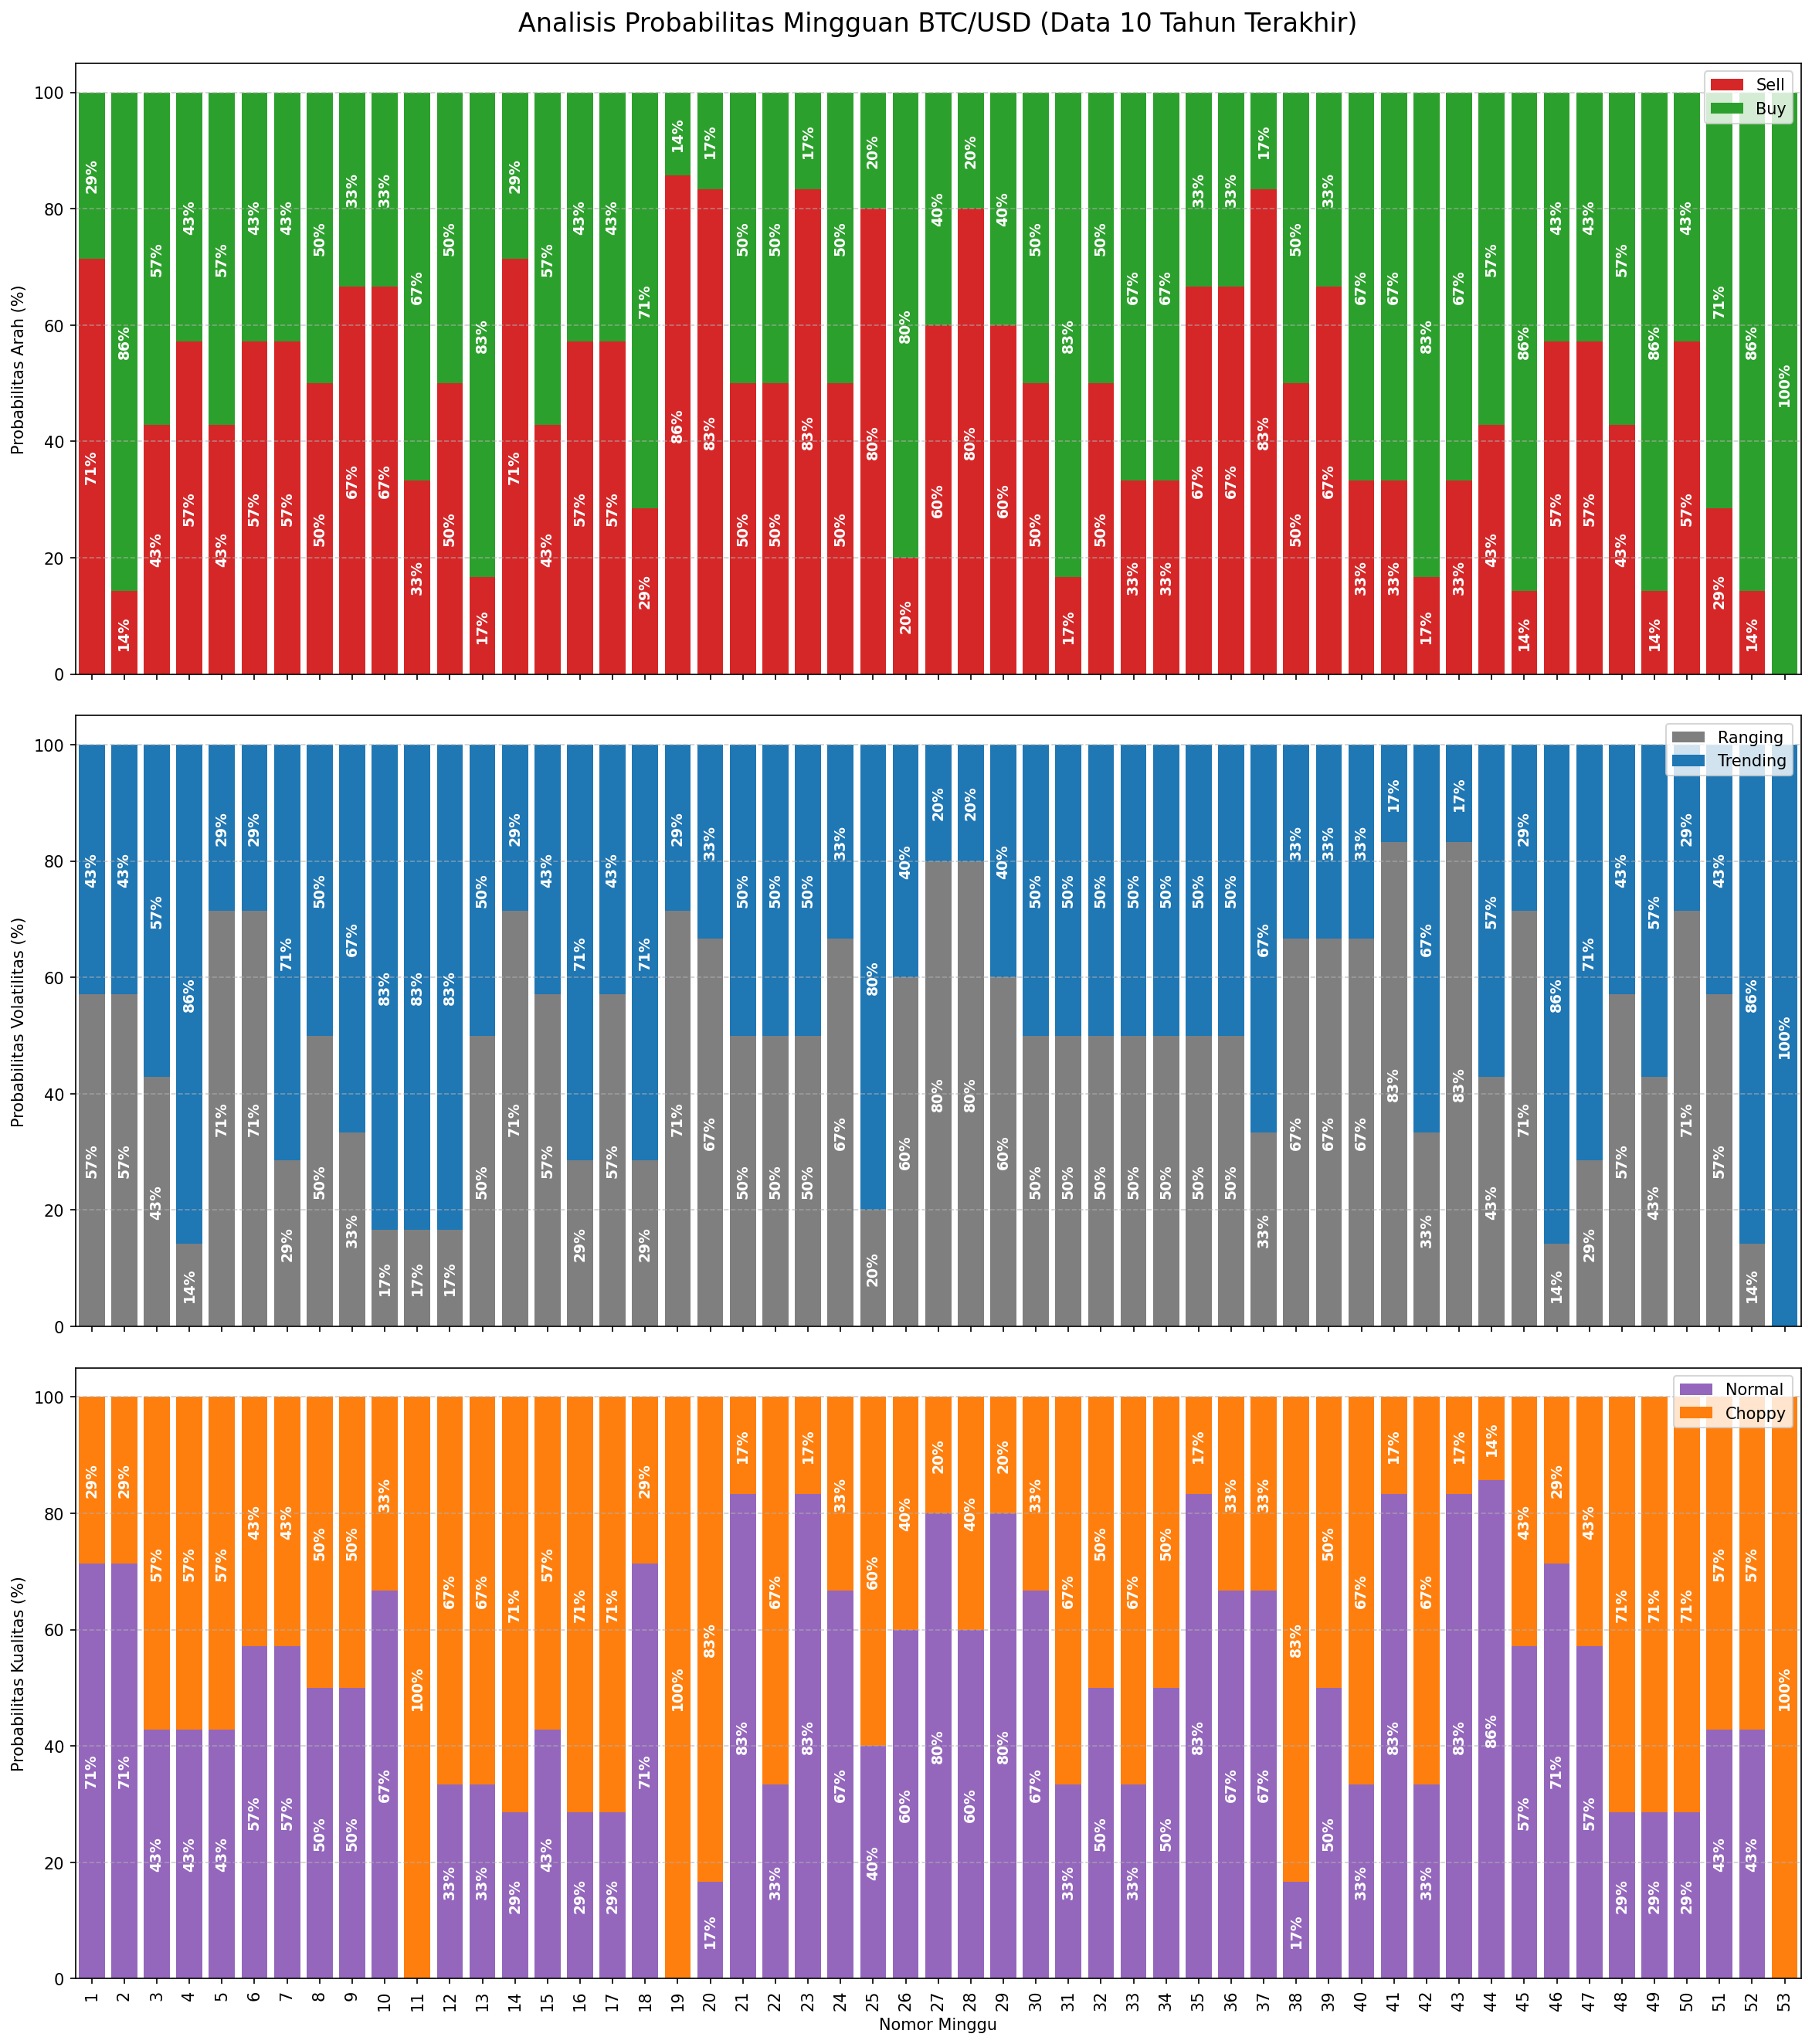

📊 Analisis Probabilitas Mingguan BTC/USD
📅 Hari ini (11 June 2025) adalah bagian dari minggu ke-24.

Ringkasan Probabilitas untuk Pekan Ini (Pekan ke-24)
Berdasarkan data historis 10 tahun terakhir:

--- 1. Probabilitas Arah ---
  🟢 Kecenderungan Buy : 50.00%
  🔴 Kecenderungan Sell: 50.00%

--- 2. Probabilitas Volatilitas ---
  🔵 Kecenderungan Trending: 33.33%
  ⚪ Kecenderungan Ranging : 66.67%

--- 3. Probabilitas Kualitas Pergerakan ---
  🟠 Kecenderungan Choppy: 33.33%
  🟡 Kecenderungan Normal: 66.67%

✅ Tabel probabilitas juga telah disimpan ke file Excel: 'Seasonal Data/Weekly Seasonal Probability - BTCUSD_Daily_201803270000_202506080000.csv - 2025-06-11.xlsx'


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

# --- 1. Pengaturan Awal (Folder & Nama File) ---
input_csv_filename = "BTCUSD_Daily_201803270000_202506080000.csv"
today_str = datetime.now().strftime('%Y-%m-%d')
output_folder = "Seasonal Data"

# Buat folder jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Buat nama file dasar untuk semua output
base_filename = f"Weekly Seasonal Probability - {input_csv_filename} - {today_str}"
chart_filepath = os.path.join(output_folder, f"{base_filename}.png")
excel_filepath = os.path.join(output_folder, f"{base_filename}.xlsx")


# --- 2. Muat & siapkan data ---
try:
    df = pd.read_csv(input_csv_filename, delim_whitespace=True)
except FileNotFoundError:
    print(f"Error: Pastikan file '{input_csv_filename}' berada di direktori yang sama.")
    exit()

df.columns = [c.strip('<>') for c in df.columns]
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y.%m.%d')
df.set_index('DATE', inplace=True)

# 3. Resample mingguan & hitung semua metrik dasar
weekly_agg = {
    'OPEN': 'first',
    'HIGH': 'max',
    'LOW': 'min',
    'CLOSE': 'last'
}
weekly = df.resample('W-MON').agg(weekly_agg)
weekly.dropna(inplace=True)

# 4. Hitung metrik turunan & klasifikasikan rezim
weekly['direction'] = np.where(weekly['CLOSE'] > weekly['OPEN'], 'Buy', 'Sell')
weekly['range_body'] = (weekly['CLOSE'] - weekly['OPEN']).abs()
weekly['year'] = weekly.index.isocalendar().year
weekly['week'] = weekly.index.isocalendar().week

def classify_regimes(group):
    median_range = group['range_body'].quantile(0.5)
    group['regime_volatility'] = np.where(group['range_body'] >= median_range, 'Trending', 'Ranging')
    group['wick_size'] = (group['HIGH'] - group['LOW']) - group['range_body']
    median_wick = group['wick_size'].quantile(0.5)
    group['regime_quality'] = np.where(group['wick_size'] >= median_wick, 'Choppy', 'Normal')
    return group

weekly = weekly.groupby('year', group_keys=False).apply(classify_regimes)

# 5. Filter data untuk 10 tahun terakhir
latest_years = sorted(weekly['year'].unique())[-10:]
weekly = weekly[weekly['year'].isin(latest_years)]

# 6. Hitung probabilitas untuk setiap kategori
prob_direction = weekly.groupby(['week', 'direction']).size().unstack(fill_value=0).div(weekly.groupby('week').size(), axis=0) * 100
prob_volatility = weekly.groupby(['week', 'regime_volatility']).size().unstack(fill_value=0).div(weekly.groupby('week').size(), axis=0) * 100
prob_quality = weekly.groupby(['week', 'regime_quality']).size().unstack(fill_value=0).div(weekly.groupby('week').size(), axis=0) * 100

# 7. Buat plot dengan 3 panel
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 18), sharex=True, dpi=150)

# --- Panel 1: Probabilitas Arah ---
colors_direction = {'Buy': '#2ca02c', 'Sell': '#d62728'}
prob_direction.reindex(columns=['Sell', 'Buy']).plot(kind='bar', stacked=True, ax=axes[0], color=colors_direction, width=0.8)
axes[0].set_ylabel('Probabilitas Arah (%)')
axes[0].set_title('Analisis Probabilitas Mingguan BTC/USD (Data 10 Tahun Terakhir)', pad=20, fontsize=16)

# --- Panel 2: Probabilitas Rezim Volatilitas ---
# >>> PALET WARNA BARU UNTUK VOLATILITAS <<<
colors_volatility = {'Trending': '#1f77b4', 'Ranging': '#7f7f7f'} # Biru dan Abu-abu
prob_volatility.reindex(columns=['Ranging', 'Trending']).plot(kind='bar', stacked=True, ax=axes[1], color=colors_volatility, width=0.8)
axes[1].set_ylabel('Probabilitas Volatilitas (%)')

# --- Panel 3: Probabilitas Rezim Kualitas ---
# >>> PALET WARNA BARU UNTUK KUALITAS <<<
colors_quality = {'Normal': '#9467bd', 'Choppy': '#ff7f0e'} # Ungu dan Oranye
prob_quality.reindex(columns=['Normal', 'Choppy']).plot(kind='bar', stacked=True, ax=axes[2], color=colors_quality, width=0.8)
axes[2].set_ylabel('Probabilitas Kualitas (%)')
axes[2].set_xlabel('Nomor Minggu')

# --- Anotasi Vertikal untuk Semua Panel ---
for i, prob_df in enumerate([prob_direction, prob_volatility, prob_quality]):
    for container in axes[i].containers:
        labels = [f'{v:.0f}%' if v > 5 else '' for v in container.datavalues]
        axes[i].bar_label(container, labels=labels, label_type='center', fontsize=9, color='white', weight='bold', rotation=90)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)
    axes[i].legend(loc='upper right')

plt.xticks(rotation=90)
plt.xlim(-0.5, 52.5)
fig.tight_layout(pad=2.0)
plt.savefig(chart_filepath, dpi=300)
print(f"✅ Grafik telah disimpan di: '{chart_filepath}'")
plt.show()

# --- Informasi Output Detail ---
today = datetime.now()
week_num = today.isocalendar().week

print(f"📊 Analisis Probabilitas Mingguan BTC/USD")
print(f"📅 Hari ini ({today.strftime('%d %B %Y')}) adalah bagian dari minggu ke-{week_num}.")
print("\n" + "="*55)
print(f"Ringkasan Probabilitas untuk Pekan Ini (Pekan ke-{week_num})")
print("Berdasarkan data historis 10 tahun terakhir:")
print("="*55)

# 1. Detail Arah
print("\n--- 1. Probabilitas Arah ---")
if week_num in prob_direction.index:
    buy_prob = prob_direction.loc[week_num].get('Buy', 0)
    sell_prob = prob_direction.loc[week_num].get('Sell', 0)
    print(f"  🟢 Kecenderungan Buy : {buy_prob:.2f}%")
    print(f"  🔴 Kecenderungan Sell: {sell_prob:.2f}%")
else:
    print("  Data tidak tersedia.")

# 2. Detail Volatilitas
print("\n--- 2. Probabilitas Volatilitas ---")
if week_num in prob_volatility.index:
    trending_prob = prob_volatility.loc[week_num].get('Trending', 0)
    ranging_prob = prob_volatility.loc[week_num].get('Ranging', 0)
    print(f"  🔵 Kecenderungan Trending: {trending_prob:.2f}%")
    print(f"  ⚪ Kecenderungan Ranging : {ranging_prob:.2f}%")
else:
    print("  Data tidak tersedia.")

# 3. Detail Kualitas
print("\n--- 3. Probabilitas Kualitas Pergerakan ---")
if week_num in prob_quality.index:
    choppy_prob = prob_quality.loc[week_num].get('Choppy', 0)
    normal_prob = prob_quality.loc[week_num].get('Normal', 0)
    print(f"  🟠 Kecenderungan Choppy: {choppy_prob:.2f}%")
    print(f"  🟡 Kecenderungan Normal: {normal_prob:.2f}%")
else:
    print("  Data tidak tersedia.")
    
print("\n" + "="*55)

# Menyimpan data ke file Excel
try:
    with pd.ExcelWriter(excel_filepath) as writer:
        prob_direction.to_excel(writer, sheet_name='Probabilitas_Arah')
        prob_volatility.to_excel(writer, sheet_name='Probabilitas_Volatilitas')
        prob_quality.to_excel(writer, sheet_name='Probabilitas_Kualitas')
    print(f"✅ Tabel probabilitas juga telah disimpan ke file Excel: '{excel_filepath}'")
except Exception as e:
    print(f"\nGagal menyimpan file Excel: {e}")


✅ Grafik telah disimpan di: 'Seasonal Data/Weekly Seasonal Probability - GBPJPY_Daily_201608110000_202506110000.csv - 2025-06-11.png'


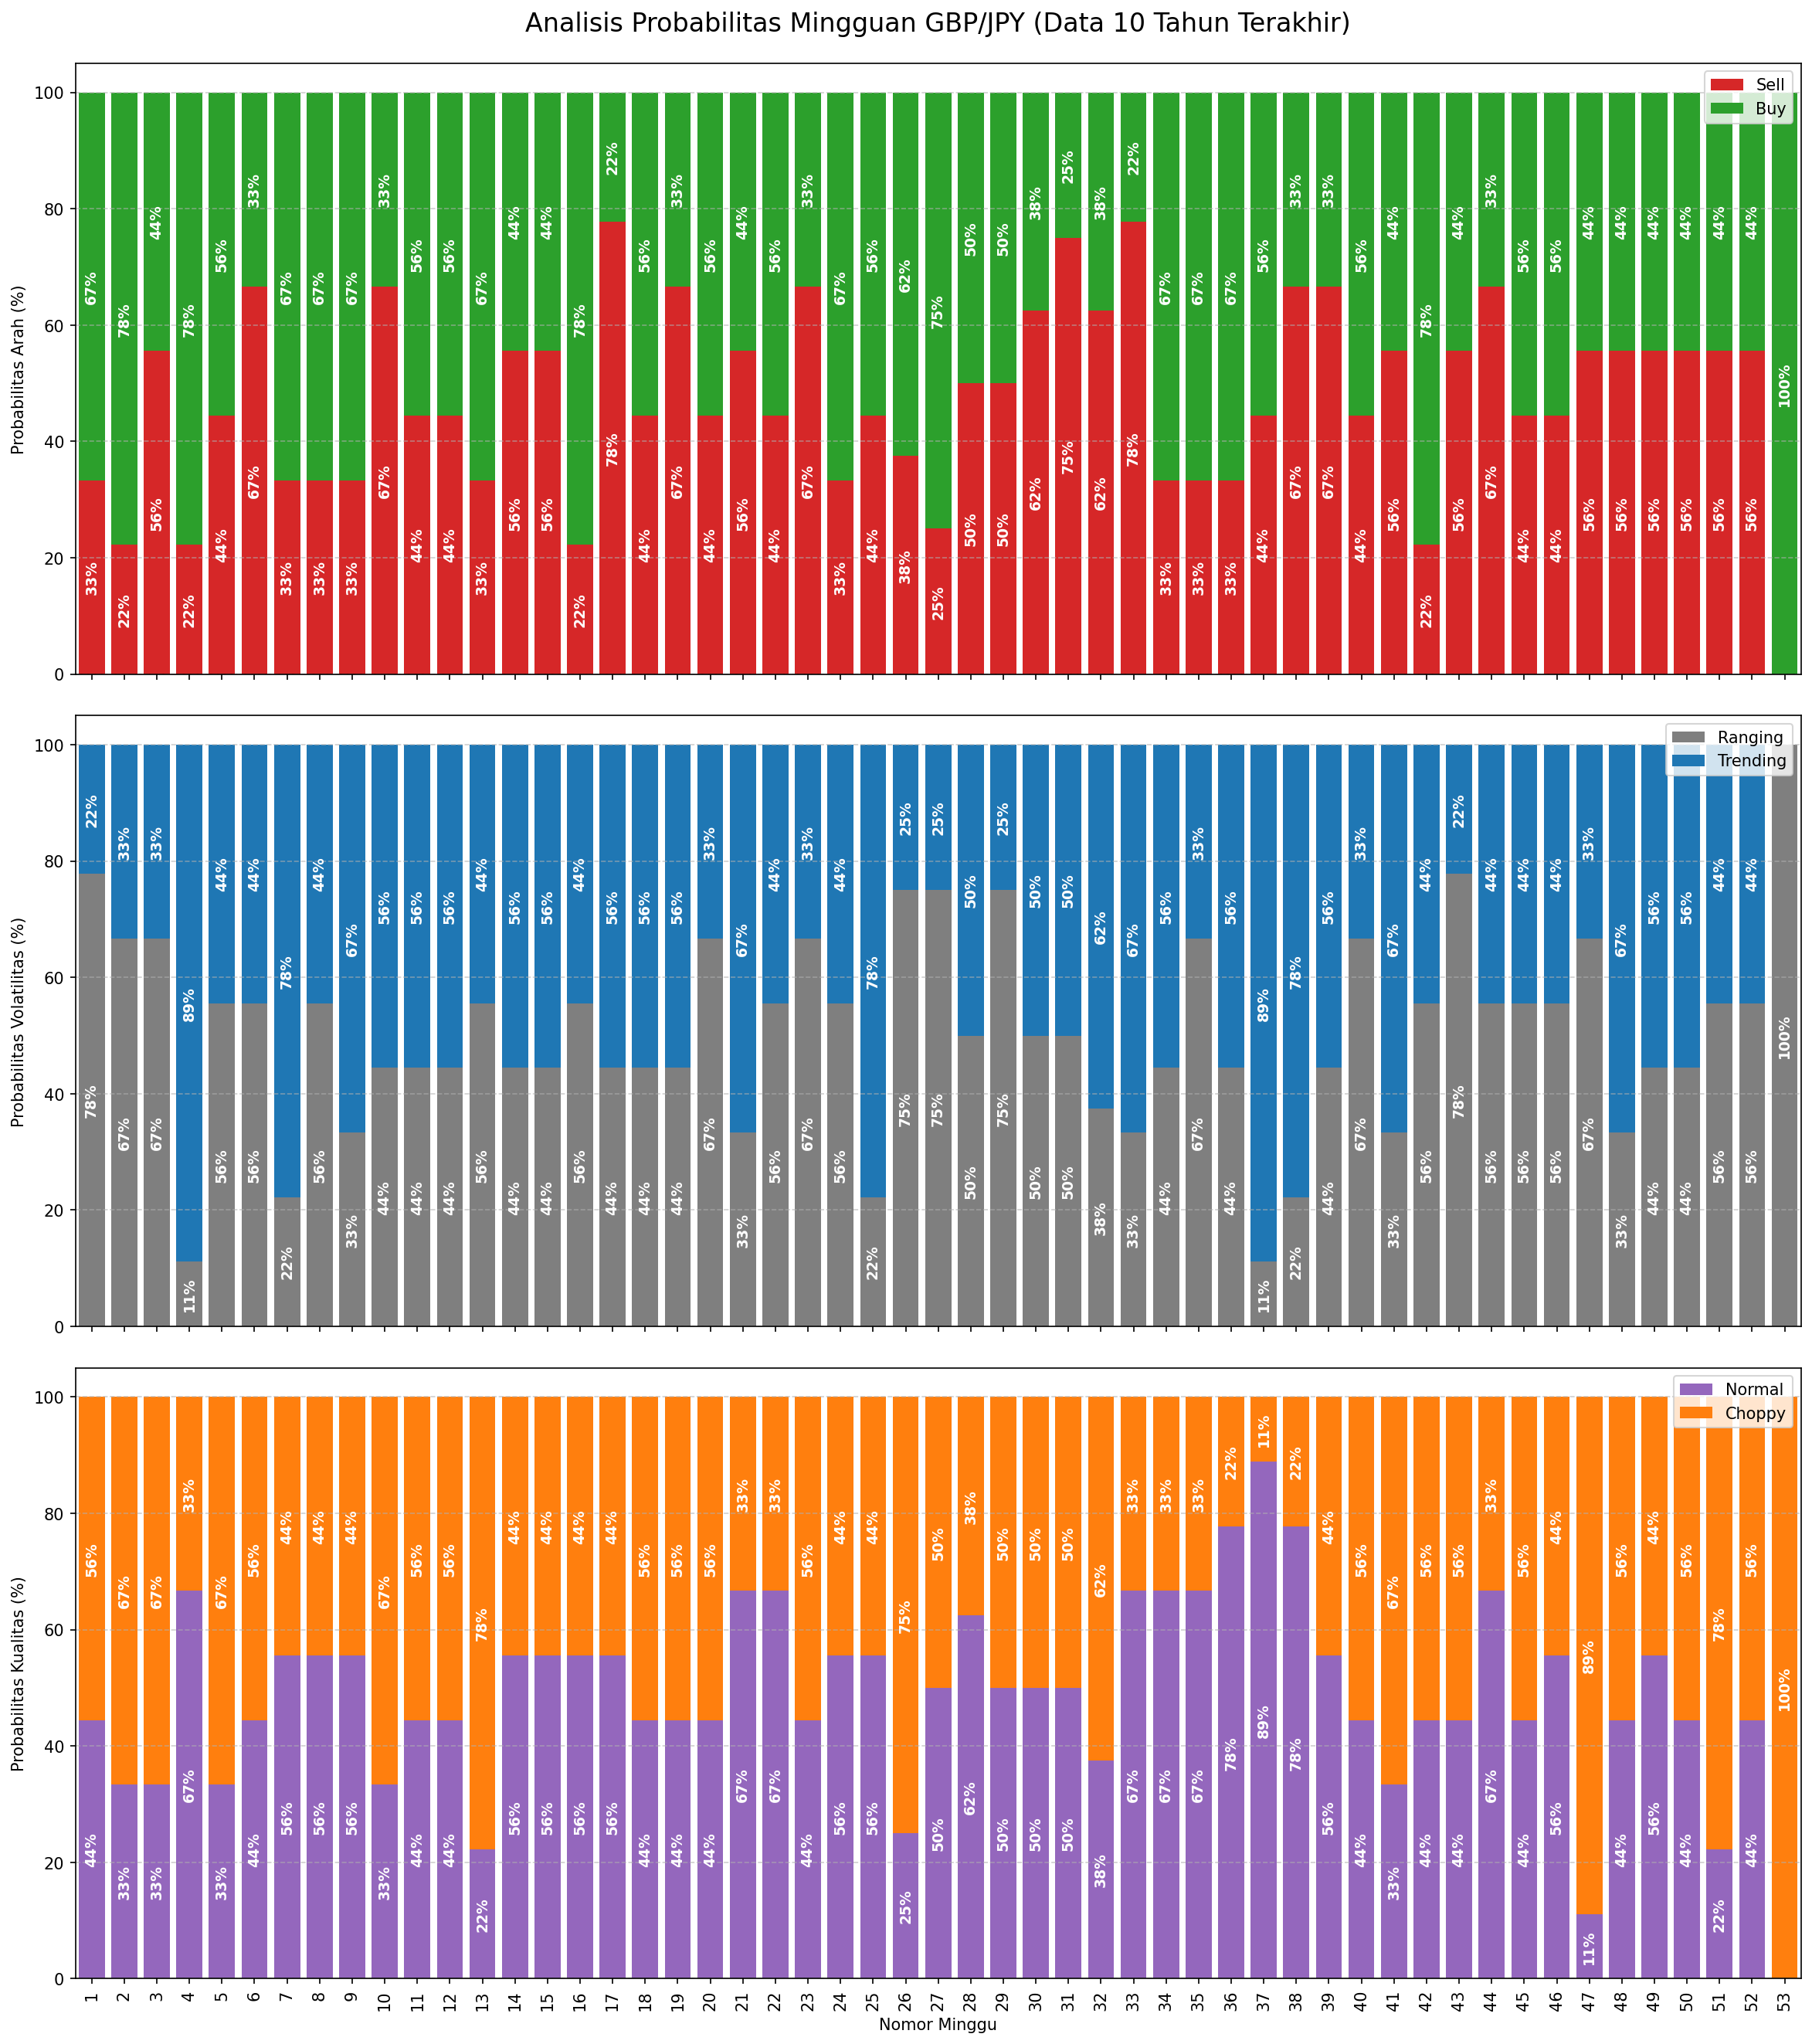

📊 Analisis Probabilitas Mingguan GBP/JPY
📅 Hari ini (11 June 2025) adalah bagian dari minggu ke-24.

Ringkasan Probabilitas untuk Pekan Ini (Pekan ke-24)
Berdasarkan data historis 10 tahun terakhir:

--- 1. Probabilitas Arah ---
  🟢 Kecenderungan Buy : 66.67%
  🔴 Kecenderungan Sell: 33.33%

--- 2. Probabilitas Volatilitas ---
  🔵 Kecenderungan Trending: 44.44%
  ⚪ Kecenderungan Ranging : 55.56%

--- 3. Probabilitas Kualitas Pergerakan ---
  🟠 Kecenderungan Choppy: 44.44%
  🟡 Kecenderungan Normal: 55.56%

✅ Tabel probabilitas juga telah disimpan ke file Excel: 'Seasonal Data/Weekly Seasonal Probability - GBPJPY_Daily_201608110000_202506110000.csv - 2025-06-11.xlsx'


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

# --- 1. Pengaturan Awal (Folder & Nama File) ---
input_csv_filename = "GBPJPY_Daily_201608110000_202506110000.csv"
today_str = datetime.now().strftime('%Y-%m-%d')
output_folder = "Seasonal Data"

# Buat folder jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Buat nama file dasar untuk semua output
base_filename = f"Weekly Seasonal Probability - {input_csv_filename} - {today_str}"
chart_filepath = os.path.join(output_folder, f"{base_filename}.png")
excel_filepath = os.path.join(output_folder, f"{base_filename}.xlsx")


# --- 2. Muat & siapkan data ---
try:
    df = pd.read_csv(input_csv_filename, delim_whitespace=True)
except FileNotFoundError:
    print(f"Error: Pastikan file '{input_csv_filename}' berada di direktori yang sama.")
    exit()

df.columns = [c.strip('<>') for c in df.columns]
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y.%m.%d')
df.set_index('DATE', inplace=True)

# 3. Resample mingguan & hitung semua metrik dasar
weekly_agg = {
    'OPEN': 'first',
    'HIGH': 'max',
    'LOW': 'min',
    'CLOSE': 'last'
}
weekly = df.resample('W-MON').agg(weekly_agg)
weekly.dropna(inplace=True)

# 4. Hitung metrik turunan & klasifikasikan rezim
weekly['direction'] = np.where(weekly['CLOSE'] > weekly['OPEN'], 'Buy', 'Sell')
weekly['range_body'] = (weekly['CLOSE'] - weekly['OPEN']).abs()
weekly['year'] = weekly.index.isocalendar().year
weekly['week'] = weekly.index.isocalendar().week

def classify_regimes(group):
    median_range = group['range_body'].quantile(0.5)
    group['regime_volatility'] = np.where(group['range_body'] >= median_range, 'Trending', 'Ranging')
    group['wick_size'] = (group['HIGH'] - group['LOW']) - group['range_body']
    median_wick = group['wick_size'].quantile(0.5)
    group['regime_quality'] = np.where(group['wick_size'] >= median_wick, 'Choppy', 'Normal')
    return group

weekly = weekly.groupby('year', group_keys=False).apply(classify_regimes)

# 5. Filter data untuk 10 tahun terakhir
latest_years = sorted(weekly['year'].unique())[-10:]
weekly = weekly[weekly['year'].isin(latest_years)]

# 6. Hitung probabilitas untuk setiap kategori
prob_direction = weekly.groupby(['week', 'direction']).size().unstack(fill_value=0).div(weekly.groupby('week').size(), axis=0) * 100
prob_volatility = weekly.groupby(['week', 'regime_volatility']).size().unstack(fill_value=0).div(weekly.groupby('week').size(), axis=0) * 100
prob_quality = weekly.groupby(['week', 'regime_quality']).size().unstack(fill_value=0).div(weekly.groupby('week').size(), axis=0) * 100

# 7. Buat plot dengan 3 panel
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 18), sharex=True, dpi=150)

# --- Panel 1: Probabilitas Arah ---
colors_direction = {'Buy': '#2ca02c', 'Sell': '#d62728'}
prob_direction.reindex(columns=['Sell', 'Buy']).plot(kind='bar', stacked=True, ax=axes[0], color=colors_direction, width=0.8)
axes[0].set_ylabel('Probabilitas Arah (%)')
axes[0].set_title('Analisis Probabilitas Mingguan GBP/JPY (Data 10 Tahun Terakhir)', pad=20, fontsize=16)

# --- Panel 2: Probabilitas Rezim Volatilitas ---
# >>> PALET WARNA BARU UNTUK VOLATILITAS <<<
colors_volatility = {'Trending': '#1f77b4', 'Ranging': '#7f7f7f'} # Biru dan Abu-abu
prob_volatility.reindex(columns=['Ranging', 'Trending']).plot(kind='bar', stacked=True, ax=axes[1], color=colors_volatility, width=0.8)
axes[1].set_ylabel('Probabilitas Volatilitas (%)')

# --- Panel 3: Probabilitas Rezim Kualitas ---
# >>> PALET WARNA BARU UNTUK KUALITAS <<<
colors_quality = {'Normal': '#9467bd', 'Choppy': '#ff7f0e'} # Ungu dan Oranye
prob_quality.reindex(columns=['Normal', 'Choppy']).plot(kind='bar', stacked=True, ax=axes[2], color=colors_quality, width=0.8)
axes[2].set_ylabel('Probabilitas Kualitas (%)')
axes[2].set_xlabel('Nomor Minggu')

# --- Anotasi Vertikal untuk Semua Panel ---
for i, prob_df in enumerate([prob_direction, prob_volatility, prob_quality]):
    for container in axes[i].containers:
        labels = [f'{v:.0f}%' if v > 5 else '' for v in container.datavalues]
        axes[i].bar_label(container, labels=labels, label_type='center', fontsize=9, color='white', weight='bold', rotation=90)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)
    axes[i].legend(loc='upper right')

plt.xticks(rotation=90)
plt.xlim(-0.5, 52.5)
fig.tight_layout(pad=2.0)
plt.savefig(chart_filepath, dpi=300)
print(f"✅ Grafik telah disimpan di: '{chart_filepath}'")
plt.show()

# --- Informasi Output Detail ---
today = datetime.now()
week_num = today.isocalendar().week

print(f"📊 Analisis Probabilitas Mingguan GBP/JPY")
print(f"📅 Hari ini ({today.strftime('%d %B %Y')}) adalah bagian dari minggu ke-{week_num}.")
print("\n" + "="*55)
print(f"Ringkasan Probabilitas untuk Pekan Ini (Pekan ke-{week_num})")
print("Berdasarkan data historis 10 tahun terakhir:")
print("="*55)

# 1. Detail Arah
print("\n--- 1. Probabilitas Arah ---")
if week_num in prob_direction.index:
    buy_prob = prob_direction.loc[week_num].get('Buy', 0)
    sell_prob = prob_direction.loc[week_num].get('Sell', 0)
    print(f"  🟢 Kecenderungan Buy : {buy_prob:.2f}%")
    print(f"  🔴 Kecenderungan Sell: {sell_prob:.2f}%")
else:
    print("  Data tidak tersedia.")

# 2. Detail Volatilitas
print("\n--- 2. Probabilitas Volatilitas ---")
if week_num in prob_volatility.index:
    trending_prob = prob_volatility.loc[week_num].get('Trending', 0)
    ranging_prob = prob_volatility.loc[week_num].get('Ranging', 0)
    print(f"  🔵 Kecenderungan Trending: {trending_prob:.2f}%")
    print(f"  ⚪ Kecenderungan Ranging : {ranging_prob:.2f}%")
else:
    print("  Data tidak tersedia.")

# 3. Detail Kualitas
print("\n--- 3. Probabilitas Kualitas Pergerakan ---")
if week_num in prob_quality.index:
    choppy_prob = prob_quality.loc[week_num].get('Choppy', 0)
    normal_prob = prob_quality.loc[week_num].get('Normal', 0)
    print(f"  🟠 Kecenderungan Choppy: {choppy_prob:.2f}%")
    print(f"  🟡 Kecenderungan Normal: {normal_prob:.2f}%")
else:
    print("  Data tidak tersedia.")
    
print("\n" + "="*55)

# Menyimpan data ke file Excel
try:
    with pd.ExcelWriter(excel_filepath) as writer:
        prob_direction.to_excel(writer, sheet_name='Probabilitas_Arah')
        prob_volatility.to_excel(writer, sheet_name='Probabilitas_Volatilitas')
        prob_quality.to_excel(writer, sheet_name='Probabilitas_Kualitas')
    print(f"✅ Tabel probabilitas juga telah disimpan ke file Excel: '{excel_filepath}'")
except Exception as e:
    print(f"\nGagal menyimpan file Excel: {e}")
